<a id="top"></a>
# Economic Freedom Analysis
---

In this analysis, we will compare datasets from two different sources that aim to measure the economic freedom of countries. Specifically, We will compare data from different years of the Economic Freedom Index with each other as well as with data from the Economic Freedom of the World dataset to see if there are any trends or patterns we can identify.

![alt text](Data/economic_freedom_index/econ_freedom.jpg "Map with different currencies")

<p style="text-align: center;"><span>Photo by <a href="https://unsplash.com/@agent_illustrateur?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Christine Roy</a> on <a href="https://unsplash.com/s/photos/money-freedom?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span></p>

## Contents
---

**1.  [Summary of Findings](#summary_of_findings)** <br>
**2.  [About the Data](#about_the_data)** <br>
**3.  [Imports & Data Setup](#imports_and_setup)** <br>
**4.  [Data Checking](#data_checking)** <br>
**5.  [Data Cleaning](#data_cleaning)** <br>
- **5i. [Economic Freedom Index 2018](#efi_2018_cleaning)** <br>
- **5ii. [Economic Freedom Index 2019](#efi_2019_cleaning)** <br>
- **5iii. [Economic Freedom Index 2020](#efi_2020_cleaning)** <br>
- **5iv. [Economic Freedom Index 2018, 2019 and 2020](#efi_2018_2019_2020_cleaning)** <br>
- **5v. [Economic Freedom of the World 2020 (2018)](#efw_2020_cleaning)** <br>

**6.  [Data Prep for EDA](#data_prep_for_eda)** <br>
**7.  [Exploratory Data Analysis](#eda)** <br>
- **7i. [Economic Freedom Index 2018](#efi_2018_eda)** <br>
- **7ii. [Economic Freedom Index 2019](#efi_2019_eda)** <br>
- **7iii. [Economic Freedom Index 2020](#efi_2020_eda)** <br>
- **7iv. [Economic Freedom of the World 2020 (2018)](#efw_2020_eda)** <br>

**8.  [Data Comparison Analysis](#data_comparison_analysis)** <br>
- **8i. [EFI Comparison (2018, 2019, 2020)](#efi_2018_2019_2020)** <br>
- **8ii. [EFI 2018 and EFW 2018](#efi_2018_efw_2018)** <br>

**9.  [Conclusions](#conclusions)** <br>
**10. [Notes](#notes)** <br>
**11. [Recommendations for Further Analysis](#further_analysis)** <br>
**12. [References](#references)** <br>

<a id="summary_of_findings"></a>
## 1. Summary of Findings
---

- Singapore now occupies the top spot as measured in the EFI 2020 dataset with Hong Kong slipping down to second place. This is an important observation as not only did Hong Kong score its highest in 2018 since the financial crash as well as rank first from 1995 in the EFI but also, as the authors of the EFW state: 
>"*Hong Kong has been in the first position at the top of the EFW index for all
years for which we have data*"


- Cuba and Venezuela score particularly low, even amongst the lowest 10 countries. While Venezuela is still last, Cuba's economic freedom score has lowered to a level that is almost equal to Venezuela.


- The variation in unemployment (%) for all years in the EFI datasets appears to be generally equal across all quartiles.


- GDP per capita increased much faster year on year for countries in the first or second quartile.



<a id="about_the_data"></a>
## 2. About the Data
---

###  Economic Freedom Index (EFI)

**Source:** Economic Freedom Index (Heritage Foundation) - https://www.heritage.org/index/download  


The Economic Freedom Index covers 12 freedoms – from property rights to financial freedom – in 186 countries.

Economic freedom is measured based on 12 quantitative and qualitative factors, grouped into four broad categories, or pillars, of economic freedom:

- **Rule of Law** (property rights, government integrity, judicial effectiveness)


- **Government Size** (government spending, tax burden, fiscal health)


- **Regulatory Efficiency** (business freedom, labor freedom, monetary freedom)


- **Open Markets** (trade freedom, investment freedom, financial freedom)

Each of the 12 economic freedoms within these categories is graded on a scale of 0 to 100. A country’s overall score is derived by averaging these twelve economic freedoms, with equal weight being given to each.

**Note:** In this analysis, we will look at data from 2018, 2019 and 2020.

*For more informationg regarding these datasets, visit - https://www.heritage.org/index/about*  


---


### Economic Freedom of the World (EFW)

**Source:** Economic Freedom of the World (Fraser Institute) - https://www.fraserinstitute.org/studies/economic-freedom


The index published in Economic Freedom of the World measures the degree to which the policies and institutions of countries are supportive of economic freedom. The cornerstones of economic freedom are personal choice, voluntary ex-change, freedom to enter markets and compete, and security of the person and privately owned property. Forty-two data points are used to construct a summary index, along with a Gender Legal Rights Adjustment to measure the extent to which women have the same level of economic freedom as men.

The degree of economic freedom is measured in five broad areas.

- **Area 1: Size of Government**
As government spending, taxation, and the size of government-controlled enterprises increase, government decision-making is substituted for individual choice and economic freedom is reduced.


- **Area 2: Legal System and Property Rights**
Protection of persons and their rightfully acquired property is a central element of both economic freedom and civil society. Indeed, it is the most important function of government.


- **Area 3: Sound Money**
Inflation erodes the value of rightfully earned wages and savings. Sound money is thus essential to protect property rights. When inflation is not only high but also volatile, it becomes difficult for individuals to plan for the future and thus use economic freedom effectively.


- **Area 4: Freedom to Trade Internationally**
Freedom to exchange—in its broadest sense, buying, selling, making contracts, and so on—is essential to economic freedom, which is reduced when freedom to exchange does not include businesses and individuals in other nations.


- **Area 5: Regulation**
Governments not only use a number of tools to limit the right to exchange internationally, they may also impose onerous regulations that limit the right to exchange, gain credit, hire or work for whom you wish, or freely operate your business.

Each of these areas are graded on a scale of 0 to 10.

**Note:** While the dataset used in this analysis is the most recent 2020 annual report (released September 10, 2020), the data only reports on figures up to 2018.

*For more information regarding this dataset, visit - https://www.fraserinstitute.org/studies/economic-freedom-of-the-world-2020-annual-report*
  

<a id="imports_and_setup"></a>
## 3. Imports & Data Setup
---

Here, we'll import all the necessary libraries that we will be working with. Because the datasets use different encoding types, we will also use the chardet module to predict the encoding type for each dataset and use that to read in the data.

In [1]:
import os
import chardet
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
from matplotlib.colors import TwoSlopeNorm
import plotly.graph_objects as go
%matplotlib inline

In [2]:
# Check data available
file_path = 'Data/economic_freedom_analysis/'
file_list = []
for dirname, _, filenames in os.walk(file_path):
    for filename in sorted(filenames):
        file_list.append(os.path.join(dirname, filename))
        print(os.path.join(dirname, filename))

Data/economic_freedom_analysis/country_iso3_codes.csv
Data/economic_freedom_analysis/economic_freedom_index2018_data.csv
Data/economic_freedom_analysis/economic_freedom_index2019_data.csv
Data/economic_freedom_analysis/economic_freedom_index2020_data.csv
Data/economic_freedom_analysis/economic_freedom_of_the_world_2020.csv


In [3]:
# Predict encoding of files using chardet
encoding_dict = {}
for filepath in file_list:
    with open(filepath, 'rb') as rawdata:
        result = chardet.detect(rawdata.read(10000))
        encoding_dict[filepath] = result['encoding']

# Read in data using correct encoding
efi_2018 = pd.read_csv(file_path + 'economic_freedom_index2018_data.csv', encoding='utf-8')
efi_2019 = pd.read_csv(file_path + 'economic_freedom_index2019_data.csv', encoding='ISO-8859-1')
efi_2020 = pd.read_csv(file_path + 'economic_freedom_index2020_data.csv', encoding='utf-8')
efw_2020 = pd.read_csv(file_path + 'economic_freedom_of_the_world_2020.csv', encoding='ascii')
iso_3 = pd.read_csv(file_path + 'country_iso3_codes.csv', encoding='utf-8')

**[Back to Top](#top)** <br>

<a id="data_checking"></a>
## 4. Data Checking
---

Once the data has successfully bean read in, we will briefly check each of the datasets to ensure everything looks as expected.

In [4]:
# Economic Freedom Index 2018
efi_2018.head()

CountryID Country Name      WEBNAME                      Region  \
0          1  Afghanistan  Afghanistan                Asia-Pacific   
1          2      Albania      Albania                      Europe   
2          3      Algeria      Algeria  Middle East / North Africa   
3          4       Angola       Angola          Sub-Saharan Africa   
4          5    Argentina    Argentina                    Americas   

   World Rank  Region Rank  2018 Score  Property Rights  \
0       154.0         38.0        51.3             17.9   
1        65.0         32.0        64.5             54.1   
2       172.0         14.0        44.7             27.8   
3       164.0         40.0        48.6             36.0   
4       144.0         26.0        52.3             40.8   

   Judical Effectiveness  Government Integrity  ...      Country  \
0                   28.2                  26.2  ...  Afghanistan   
1                   25.4                  39.9  ...      Albania   
2                   35.2                  29.0  ...      Algeria   
3                   25.4                  18.9  ...       Angola   
4                   44.5                  32.6  ...    Argentina   

   Population (Millions)  GDP (Billions, PPP)  GDP Growth Rate (%)  \
0                   33.4               $64.1                   1.5   
1                    2.9               $34.2                   2.6   
2                   40.8              $612.5                   3.7   
3                   27.4              $187.3                   3.0   
4                   43.6              $874.1                   1.2   

   5 Year GDP Growth Rate (%)  GDP per Capita (PPP)  Unemployment (%)  \
0                         4.4              $1,918.6               8.5   
1                         2.0             $11,840.2              16.3   
2                         3.6             $15,026.5              11.2   
3                         4.0              $6,844.4               6.6   
4                        -0.2             $20,047.5               6.6   

   Inflation (%)  FDI Inflow (Millions)  Public Debt (% of GDP)  
0            4.4                   99.6                     8.3  
1            1.3                1,124.3                    71.5  
2            6.4                1,546.0                    20.4  
3           32.4               14,363.6                    71.9  
4           58.4                5,745.2                    51.3  

[5 rows x 34 columns]

In [5]:
# Economic Freedom Index 2019
efi_2019.head()

CountryID Country Name      WEBNAME                        Region  \
0          1  Afghanistan  Afghanistan                  Asia-Pacific   
1          2      Albania      Albania                        Europe   
2          3      Algeria      Algeria  Middle East and North Africa   
3          4       Angola       Angola            Sub-Saharan Africa   
4          5    Argentina    Argentina                      Americas   

   World Rank  Region Rank  2019 Score  Property Rights  \
0       152.0         39.0        51.5             19.6   
1        52.0         27.0        66.5             54.8   
2       171.0         14.0        46.2             31.6   
3       156.0         33.0        50.6             35.9   
4       148.0         26.0        52.2             47.8   

   Judical Effectiveness  Government Integrity  ...      Country  \
0                   29.6                  25.2  ...  Afghanistan   
1                   30.6                  40.4  ...      Albania   
2                   36.2                  28.9  ...      Algeria   
3                   26.6                  20.5  ...       Angola   
4                   44.5                  33.5  ...    Argentina   

   Population (Millions)  GDP (Billions, PPP)  GDP Growth Rate (%)  \
0                   35.5               $69.6                   2.5   
1                    2.9               $36.0                   3.9   
2                   41.5              $632.9                   2.0   
3                   28.2              $190.3                   0.7   
4                   44.1              $920.2                   2.9   

   5 Year GDP Growth Rate (%)  GDP per Capita (PPP)  Unemployment (%)  \
0                         2.9                $1,958               8.8   
1                         2.5               $12,507              13.9   
2                         3.1               $15,237              10.0   
3                         2.9                $6,753               8.2   
4                         0.7               $20,876               8.7   

   Inflation (%)  FDI Inflow (Millions)  Public Debt (% of GDP)  
0            5.0                   53.9                     7.3  
1            2.0                1,119.1                    71.2  
2            5.6                1,203.0                    25.8  
3           31.7               -2,254.5                    65.3  
4           25.7               11,857.0                    52.6  

[5 rows x 34 columns]

In [6]:
# Economic Freedom Index 2020
efi_2020.head()

CountryID Country Name      WEBNAME                        Region  \
0          1  Afghanistan  Afghanistan                  Asia-Pacific   
1          2      Albania      Albania                        Europe   
2          3      Algeria      Algeria  Middle East and North Africa   
3          4       Angola       Angola            Sub-Saharan Africa   
4          5    Argentina    Argentina                      Americas   

   World Rank  Region Rank  2020 Score  Property Rights  \
0       136.0         33.0        54.7             48.3   
1        57.0         30.0        66.9             57.1   
2       169.0         14.0        46.9             37.9   
3       154.0         35.0        52.2             36.9   
4       149.0         26.0        53.1             50.5   

   Judical Effectiveness  Government Integrity  ...      Country  \
0                   30.0                  24.8  ...  Afghanistan   
1                   33.0                  38.8  ...      Albania   
2                   35.0                  28.3  ...      Algeria   
3                   14.3                  15.1  ...       Angola   
4                   47.0                  49.7  ...    Argentina   

   Population (Millions)  GDP (Billions, PPP)  GDP Growth Rate (%)  \
0                   36.0               $72.6                   2.3   
1                    2.9               $38.4                   4.2   
2                   42.6              $657.5                   2.1   
3                   29.3              $199.3                  -1.7   
4                   44.6              $915.1                  -2.5   

   5 Year GDP Growth Rate (%)  GDP per Capita (PPP)  Unemployment (%)  \
0                         2.2                $2,017               1.5   
1                         3.1               $13,345              13.9   
2                         2.8               $15,440              12.2   
3                         0.3                $6,814               7.3   
4                        -0.3               $20,537               9.5   

   Inflation (%)  FDI Inflow (Millions)  Public Debt (% of GDP)  
0            0.6                  139.2                     7.1  
1            2.0                1,293.6                    68.6  
2            4.3                1,506.3                    36.9  
3           19.6               -5,732.5                    88.1  
4           34.3               12,161.8                    86.3  

[5 rows x 34 columns]

In [7]:
# Economic Freedom of the World 2020 (Data only up to 2018)
efw_2020.head()

year iso_code  countries  economic_freedom_summary_index   rank  quartile  \
0  2018      ALB    Albania                            7.80   26.0       1.0   
1  2018      DZA    Algeria                            4.97  157.0       4.0   
2  2018      AGO     Angola                            4.75  159.0       4.0   
3  2018      ARG  Argentina                            5.78  144.0       4.0   
4  2018      ARM    Armenia                            7.92   18.0       1.0   

   1a_government_consumption  1b_transfers_and_subsidies  \
0                       8.16                        6.74   
1                       3.22                        7.82   
2                       7.70                        9.62   
3                       5.94                        6.31   
4                       7.72                        7.71   

   1c_government_investment  1d_top_marginal_tax_rate  ...  3_sound_money  \
0                      8.00                       8.0  ...           9.82   
1                      4.61                       4.5  ...           7.92   
2                      6.33                       9.5  ...           4.70   
3                      7.59                       4.0  ...           5.07   
4                      9.30                       5.0  ...           9.56   

   4a_tariffs  4b_regulatory_trade_barriers  4c_black_market_exchange_rates  \
0        9.02                          8.11                            10.0   
1        6.87                          2.52                             0.0   
2        7.27                          3.60                             0.0   
3        6.77                          5.36                            10.0   
4        8.44                          7.50                            10.0   

   4d_controls_of_the_movement_of_capital_and_people  \
0                                               5.69   
1                                               0.92   
2                                               0.81   
3                                               7.49   
4                                               7.91   

   4_freedom_to_trade_internationally  5a_credit_market_regulations  \
0                                8.20                          9.74   
1                                2.58                          5.10   
2                                2.92                          5.18   
3                                7.41                          5.75   
4                                8.46                          9.55   

   5b_labor_market_regulations  5c_business_regulations  5_regulation  
0                         6.72                     6.71          7.72  
1                         5.65                     5.95          5.56  
2                         5.34                     5.64          5.39  
3                         5.12                     6.40          5.76  
4                         6.46                     7.28          7.76  

[5 rows x 35 columns]

In [8]:
# ISO 3166-1 alpha-3 Country Codes
iso_3.head()

Country Alpha-3 code
0  Afghanistan          AFG
1      Albania          ALB
2      Algeria          DZA
3       Angola          AGO
4    Argentina          ARG

**[Back to Top](#top)** <br>

<a id="data_cleaning"></a>
## 5. Data Cleaning
---

Now we will go through each of the Economic Freedom datasets and clean them up. In particular, we will drop redundant columns, remove countries that have more than 10% of missing data, impute remaining missing values with figures from 2020, remove any unecessary characters and whitespace from values and finally convert object data types that contain numerical data to numerical data types.


The decision to remove countries with 10% or more of data missing might seem strict given the small size of the datasets, however, upon closer inspection, much of the data missing from these countries was key for further analysis. Additionally, the decision to impute the remaining missing values with figures from 2020 was due to the fact that the data for those missing values was for the most part missing in the preceding years. The data from 2020 was much more comprehensive, and therefore it made sense to use these figures rather than using other methods to impute those missing values.

**5i. [Economic Freedom Index 2018](#efi_2018_cleaning)** <br>
**5ii. [Economic Freedom Index 2019](#efi_2019_cleaning)** <br>
**5iii. [Economic Freedom Index 2020](#efi_2020_cleaning)** <br>
**5iv. [Economic Freedom Index 2018, 2019 and 2020](#efi_2018_2019_2020_cleaning)** <br>
**5v. [Economic Freedom of the World 2020 (2018)](#efw_2020_cleaning)** <br>

<a id="efi_2018_cleaning"></a>
### 5i. Economic Freedom Index 2018
---

In [9]:
# Check shape
print('Rows: {} \n\nColumns: {}'.format(efi_2018.shape[0], efi_2018.shape[1]))

Rows: 186 

Columns: 34


In [10]:
# Check info
efi_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CountryID                    186 non-null    int64  
 1   Country Name                 186 non-null    object 
 2   WEBNAME                      186 non-null    object 
 3   Region                       186 non-null    object 
 4   World Rank                   180 non-null    float64
 5   Region Rank                  180 non-null    float64
 6   2018 Score                   180 non-null    float64
 7   Property Rights              185 non-null    float64
 8   Judical Effectiveness        185 non-null    float64
 9   Government Integrity         185 non-null    float64
 10  Tax Burden                   181 non-null    float64
 11  Gov't Spending               183 non-null    float64
 12  Fiscal Health                184 non-null    float64
 13  Business Freedom    

In [11]:
# Calculate percentage of missing data in whole dataset
efi_2018_pct_missing = round(100 * (efi_2018.isnull().sum().sum()/efi_2018.size), 2)
print(f'Percentage of missing data: {efi_2018_pct_missing}%')

Percentage of missing data: 1.36%


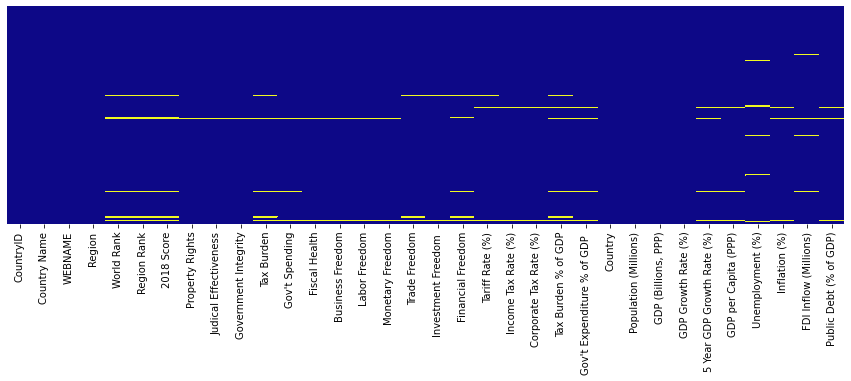

In [12]:
# Visualise missing data
fig, ax = plt.subplots(figsize=(15,4))
ax = sns.heatmap(efi_2018.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [13]:
# Calculate % of missing data for each column with missing data
print("   Percent of data missing for each column.\n")
print("   Column                            % Missing")
print("   -------------------------------------------")
for col in efi_2018.columns:
    efi_2018_pct_missing_data = round(100 * (efi_2018[col].isnull().sum()/len(efi_2018)), 2)
    if efi_2018_pct_missing_data > 0:
        print("  ",col, " "*(35-len(col)),efi_2018_pct_missing_data)

   Percent of data missing for each column.

   Column                            % Missing
   -------------------------------------------
   World Rank                           3.23
   Region Rank                          3.23
   2018 Score                           3.23
   Property Rights                      0.54
   Judical Effectiveness                0.54
   Government Integrity                 0.54
   Tax Burden                           2.69
   Gov't Spending                       1.61
   Fiscal Health                        1.08
   Business Freedom                     1.08
   Labor Freedom                        1.08
   Monetary Freedom                     1.08
   Trade Freedom                        1.61
   Investment Freedom                   1.08
   Financial Freedom                    2.69
   Tariff Rate (%)                      1.61
   Income Tax Rate (%)                  1.08
   Corporate Tax Rate (%)               1.08
   Tax Burden % of GDP                  3.23
   Gov

In [14]:
# Create empty dict to store indexes and amount of null values for each index
efi_2018_null_dict = {}
for row in efi_2018.index:
    efi_2018_null_dict[row] = efi_2018.loc[efi_2018.index[row]].isnull().sum()
    
# Filter out those rows which have at least one null value
efi_2018_null_vals_row_check = {k:v for (k,v) in efi_2018_null_dict.items() if v > 0}

# Calculate percentage of missing data for each row with atleast one missing value
efi_2018_null_vals_row_pct = {k:str(round(100 * (v/(len(efi_2018.columns))),2)) + '%' for (k,v) in efi_2018_null_vals_row_check.items()}

# Find countries who are missing more than 10% of data
efi_2018_countries_over_10pct_missing = [k for (k,v) in efi_2018_null_vals_row_pct.items() if float(v[:-1]) > 10.00]
efi_2018.loc[efi_2018_countries_over_10pct_missing][['Country Name']]

Country Name
76            Iraq
86   Korea, North 
95           Libya
96   Liechtenstein
158          Syria
180          Yemen
183        Somalia

Here, we drop these 7 countries that have over 10% of missing data. We then recalculate how much data we have that is still missing.

In [15]:
# Drop all of these countries from the dataset and reset index
efi_2018.drop(efi_2018_countries_over_10pct_missing, inplace=True)
efi_2018.reset_index(drop=True, inplace=True)

# Recalculate percentage of missing data in whole dataset
efi_2018_pct_missing = round(100 * (efi_2018.isnull().sum().sum()/efi_2018.size), 2)
print(f'Percentage of missing data: {efi_2018_pct_missing}%')

Percentage of missing data: 0.12%


In [16]:
# Remaining null values
efi_2018.isnull().sum().sum()

7

In [17]:
# Calculate % of missing data for each column with missing data
print("   Percent of data missing for each column.\n")
print("   Column                            % Missing")
print("   -------------------------------------------")
for col in efi_2018.columns:
    efi_2018_pct_missing_data = round(100 * (efi_2018[col].isnull().sum()/len(efi_2018)), 2)
    if efi_2018_pct_missing_data > 0:
        print("  ",col, " "*(35-len(col)),efi_2018_pct_missing_data)

   Percent of data missing for each column.

   Column                            % Missing
   -------------------------------------------
   Unemployment (%)                     2.79
   FDI Inflow (Millions)                1.12


In [18]:
# Find index of all rows with missing data
efi_2018_nan_countries = efi_2018.index[efi_2018.isnull().any(axis=1)].values

# Columns with NaN values
efi_2018_nan_cols = efi_2018.isnull().sum()
efi_2018_nan_cols_list = [efi_2018_nan_cols.index[idx] for idx in range(len(efi_2018_nan_cols)) if efi_2018_nan_cols.values[idx] > 0
                                                                     or efi_2018_nan_cols.index[idx] == 'Country Name']

# All countries with some missing data
efi_2018.loc[efi_2018_nan_countries][efi_2018_nan_cols_list]

Country Name Unemployment (%) FDI Inflow (Millions)
41          Cuba              2.9                   NaN
46      Dominica              NaN                  31.4
84      Kiribati              NaN                   3.1
106   Micronesia              NaN                   NaN
140   Seychelles              NaN                 155.2
177       Kosovo              NaN      249.0 (2014 net)

We can see that the remaining missing data is mostly unemployment statistics with some missing FDI figures. As mentioned earlier, we will impute all of these missing values with data from the Economic Freedom Index 2020.

We will also ensure that we use string values for now as this will make it easier to convert the data types later.

In [19]:
# Fill in missing data with data from 2020

# Cuba - FDI = 1542.18
efi_2018.loc[efi_2018['Country Name']=='Cuba', 'FDI Inflow (Millions)'] = '1542.18' # Value from 2020

# Dominica - Unemployment = 0
efi_2018.loc[efi_2018['Country Name']=='Dominica', 'Unemployment (%)'] = '0' # No value between 2016 to 2020

# Kiribati - Unemployment = 30.6 
efi_2018.loc[efi_2018['Country Name']=='Kiribati', 'Unemployment (%)'] = '30.6' # Value from 2020

# Micronesia - Unemployment = 16.2 | FDI = 20.2
efi_2018.loc[efi_2018['Country Name']=='Micronesia', 'Unemployment (%)'] = '16.2' # Value from 2020
efi_2018.loc[efi_2018['Country Name']=='Micronesia', 'FDI Inflow (Millions)'] = '20.2' # Value from 2020

# Seychelles - Unemployment = 3.0
efi_2018.loc[efi_2018['Country Name']=='Seychelles', 'Unemployment (%)'] = '3.0' # Value from 2020

# Kosovo - Unemployment = 30.5 
efi_2018.loc[efi_2018['Country Name']=='Kosovo', 'Unemployment (%)'] = '30.5' # Value from 2020

In [20]:
# Remaining null values
efi_2018.isnull().sum().sum()

0

In [21]:
# Check to see if 'Country Name' column matches exactly with 'Country' column
efi_2018_country_matches = np.where(efi_2018['Country Name'] == efi_2018['Country'], 'True', 'False')
efi_2018_mismatches = str(np.count_nonzero(efi_2018_country_matches == 'False')) + ' out of ' + str(len(efi_2018_country_matches))
print(efi_2018_mismatches)

3 out of 179


In [22]:
# Find indexes where data does not match
efi_2018_unequal_country_vals = efi_2018.index[efi_2018['Country Name'] != efi_2018['Country']].tolist()

# Look at rows where data does not match
efi_2018_country_cols = ['Country Name', 'Country']
efi_2018.loc[efi_2018_unequal_country_vals][efi_2018_country_cols]

Country Name          Country
70     Hong Kong    Hong Kong SAR
88          Laos       Lao P.D.R.
143     Slovakia  Slovak Republic

We can see that the countries that do not match in these two columns are the same countries with just slight variations on the country name. This means we can drop the 'Country' column as it does not provide any additional information. For the same reason, we will also drop the 'CountryID' and 'WEBNAME' columns.

Once these columns are removed, we can then clean up any unnecessary characters (text, currency symbols, commas, whitespace) from our data and convert the values to numerical data.

In [23]:
# Remove columns that contain the same information as 'Country Name' column
efi_2018.drop(['CountryID','WEBNAME', 'Country'], axis = 1, inplace=True) 

# Remove any whitespace from column names
efi_2018.columns = efi_2018.columns.str.strip()

# Change 'Population (Millions)' values to float
efi_2018['Population (Millions)'] = efi_2018['Population (Millions)'].astype('float64')

# Remove dollars, commas and whitespace from values in 'GDP (Billions, PPP)' column and convert to float
efi_2018['GDP (Billions, PPP)'] = efi_2018['GDP (Billions, PPP)'].str.replace('$', '')
efi_2018['GDP (Billions, PPP)'] = efi_2018['GDP (Billions, PPP)'].str.replace(',', '')
efi_2018['GDP (Billions, PPP)'] = efi_2018['GDP (Billions, PPP)'].str.strip()
efi_2018['GDP (Billions, PPP)'] = efi_2018['GDP (Billions, PPP)'].astype('float64')

# Removing the text from 'GDP per Capita (PPP)' for Kosovo
efi_2018_gdp_capita_kosovo = efi_2018.loc[efi_2018['Country Name'] == 'Kosovo']['GDP per Capita (PPP)'].values[0].split(' ')[0]
efi_2018.loc[efi_2018['Country Name']=='Kosovo', 'GDP per Capita (PPP)'] = efi_2018_gdp_capita_kosovo

# Remove dollars and commas from values in 'GDP per Capita (PPP)' column and convert to numeric
efi_2018['GDP per Capita (PPP)'] = efi_2018['GDP per Capita (PPP)'].str.replace('$', '')
efi_2018['GDP per Capita (PPP)'] = efi_2018['GDP per Capita (PPP)'].str.replace(',', '')
efi_2018['GDP per Capita (PPP)'] = pd.to_numeric(efi_2018['GDP per Capita (PPP)'])

# Change 'Unemployment (%)' Percentages to float
efi_2018['Unemployment (%)'] = efi_2018['Unemployment (%)'].astype('float64')

# Removing the text from 'FDI Inflow (Millions)' for Kosovo
efi_2018_fdi_kosovo = efi_2018.loc[efi_2018['Country Name'] == 'Kosovo']['FDI Inflow (Millions)'].values[0].split(' ')[0]
efi_2018.loc[efi_2018['Country Name']=='Kosovo', 'FDI Inflow (Millions)'] = efi_2018_fdi_kosovo

# Remove commas from 'FDI Inflow (Millions)' column and convert to float
efi_2018['FDI Inflow (Millions)'] = efi_2018['FDI Inflow (Millions)'].str.replace(',', '')
efi_2018['FDI Inflow (Millions)'] = efi_2018['FDI Inflow (Millions)'].astype('float64')

# Convert '5 Year GDP Growth Rate (%)' values to float
efi_2018['5 Year GDP Growth Rate (%)'] = efi_2018['5 Year GDP Growth Rate (%)'].astype('float64')

# Convert 'GDP Growth Rate (%)' to float values
efi_2018['GDP Growth Rate (%)'] = efi_2018['GDP Growth Rate (%)'].astype('float64')

In [24]:
# Check info for entire dataset to ensure it is clean
efi_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country Name                179 non-null    object 
 1   Region                      179 non-null    object 
 2   World Rank                  179 non-null    float64
 3   Region Rank                 179 non-null    float64
 4   2018 Score                  179 non-null    float64
 5   Property Rights             179 non-null    float64
 6   Judical Effectiveness       179 non-null    float64
 7   Government Integrity        179 non-null    float64
 8   Tax Burden                  179 non-null    float64
 9   Gov't Spending              179 non-null    float64
 10  Fiscal Health               179 non-null    float64
 11  Business Freedom            179 non-null    float64
 12  Labor Freedom               179 non-null    float64
 13  Monetary Freedom            179 non

<a id="efi_2019_cleaning"></a>
### 5ii. Economic Freedom Index 2019
---

In [25]:
# Check shape
print('Rows: {} \n\nColumns: {}'.format(efi_2019.shape[0], efi_2019.shape[1]))

Rows: 186 

Columns: 34


In [26]:
# Check info
efi_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CountryID                    186 non-null    int64  
 1   Country Name                 186 non-null    object 
 2   WEBNAME                      186 non-null    object 
 3   Region                       186 non-null    object 
 4   World Rank                   180 non-null    float64
 5   Region Rank                  180 non-null    float64
 6   2019 Score                   180 non-null    float64
 7   Property Rights              185 non-null    float64
 8   Judical Effectiveness        185 non-null    float64
 9   Government Integrity         185 non-null    float64
 10  Tax Burden                   180 non-null    float64
 11  Gov't Spending               183 non-null    float64
 12  Fiscal Health                183 non-null    float64
 13  Business Freedom    

In [27]:
# Calculate percentage of missing data in whole dataset
efi_2019_pct_missing = round(100 * (efi_2019.isnull().sum().sum()/efi_2019.size), 2)
print(f'Percentage of missing data: {efi_2019_pct_missing}%')

Percentage of missing data: 1.52%


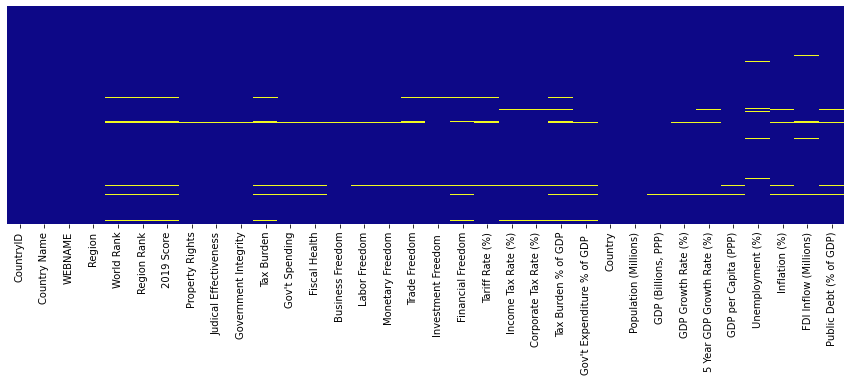

In [28]:
# Visualise missing data
fig, ax = plt.subplots(figsize=(15,4))
ax = sns.heatmap(efi_2019.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [29]:
# Calculate % of missing data for each column with missing data
print("   Percent of data missing for each column.\n")
print("   Column                            % Missing")
print("   -------------------------------------------")
for col in efi_2019.columns:
    efi_2019_pct_missing_data = round(100 * (efi_2019[col].isnull().sum()/len(efi_2019)), 2)
    if efi_2019_pct_missing_data > 0:
        print("  ",col, " "*(35-len(col)),efi_2019_pct_missing_data)

   Percent of data missing for each column.

   Column                            % Missing
   -------------------------------------------
   World Rank                           3.23
   Region Rank                          3.23
   2019 Score                           3.23
   Property Rights                      0.54
   Judical Effectiveness                0.54
   Government Integrity                 0.54
   Tax Burden                           3.23
   Gov't Spending                       1.61
   Fiscal Health                        1.61
   Business Freedom                     0.54
   Labor Freedom                        1.08
   Monetary Freedom                     1.08
   Trade Freedom                        2.15
   Investment Freedom                   1.08
   Financial Freedom                    2.69
   Tariff Rate (%)                      2.15
   Income Tax Rate (%)                  1.61
   Corporate Tax Rate (%)               1.61
   Tax Burden % of GDP                  3.76
   Gov

In [30]:
# Create empty dict to store indexes and amount of null values for each index
efi_2019_null_dict = {}
for row in efi_2019.index:
    efi_2019_null_dict[row] = efi_2019.loc[efi_2019.index[row]].isnull().sum()
    
# Filter out those rows which have at least one null value
efi_2019_null_vals_row_check = {k:v for (k,v) in efi_2019_null_dict.items() if v > 0}

# Calculate percentage of missing data for each row with atleast one missing value
efi_2019_null_vals_row_pct = {k:str(round(100 * (v/(len(efi_2019.columns))),2)) + '%' for (k,v) in efi_2019_null_vals_row_check.items()}

# Find countries who are missing more than 10% of data
efi_2019_countries_over_10pct_missing = [k for (k,v) in efi_2019_null_vals_row_pct.items() if float(v[:-1]) > 10.00]
efi_2019.loc[efi_2019_countries_over_10pct_missing][['Country Name']]

Country Name
78            Iraq
88   Korea, North 
98           Libya
99   Liechtenstein
153        Somalia
161          Syria
183          Yemen

Once again, we will drop these 7 countries that have 10% or more of missing data.

In [31]:
# Drop all of these countries from the dataset and reset index
efi_2019.drop(efi_2019_countries_over_10pct_missing, inplace=True)
efi_2019.reset_index(drop=True, inplace=True)

# Recalculate percentage of missing data in whole dataset
efi_2019_pct_missing = round(100 * (efi_2019.isnull().sum().sum()/efi_2019.size), 2)
print(f'Percentage of missing data: {efi_2019_pct_missing}%')

Percentage of missing data: 0.12%


In [32]:
# Remaining null values
efi_2019.isnull().sum().sum()

7

In [33]:
# Calculate % of missing data for each column with missing data
print("   Percent of data missing for each column.\n")
print("   Column                            % Missing")
print("   -------------------------------------------")
for col in efi_2019.columns:
    efi_2019_pct_missing_data = round(100 * (efi_2019[col].isnull().sum()/len(efi_2019)), 2)
    if efi_2019_pct_missing_data > 0:
        print("  ",col, " "*(35-len(col)),efi_2019_pct_missing_data)

   Percent of data missing for each column.

   Column                            % Missing
   -------------------------------------------
   Unemployment (%)                     2.79
   FDI Inflow (Millions)                1.12


In [34]:
# Find index of all rows with missing data
efi_2019_nan_countries = efi_2019.index[efi_2019.isnull().any(axis=1)].values

# Columns with NaN values
efi_2019_nan_cols = efi_2019.isnull().sum()
efi_2019_nan_cols_list = [efi_2019_nan_cols.index[idx] for idx in range(len(efi_2019_nan_cols)) if efi_2019_nan_cols.values[idx] > 0
                                                                     or efi_2019_nan_cols.index[idx] == 'Country Name']

# All countries with some missing data
efi_2019.loc[efi_2019_nan_countries][efi_2019_nan_cols_list]

Country Name Unemployment (%) FDI Inflow (Millions)
42          Cuba              2.6                   NaN
47      Dominica              NaN                  18.9
86      Kiribati              NaN                   1.4
88        Kosovo              NaN                   3.6
109   Micronesia              NaN                   NaN
143   Seychelles              NaN                 191.9

As with the Economic Freedom Index 2018, the data is still missing for these countries in 2019 so again we will use the figures from the latest Economic Freedom Index 2020 to impute these missing values.

In [35]:
# Fill in missing data with data from 2020

# Cuba - FDI = 1542.18
efi_2019.loc[efi_2019['Country Name']=='Cuba', 'FDI Inflow (Millions)'] = '1542.18' # Value from 2020

# Dominica - Unemployment = 0 
efi_2019.loc[efi_2019['Country Name']=='Dominica', 'Unemployment (%)'] = '0' # No value between 2016 to 2020

# Kiribati - Unemployment = 30.6
efi_2019.loc[efi_2019['Country Name']=='Kiribati', 'Unemployment (%)'] = '30.6' # Value from 2020

# Kosovo - Unemployment = 30.5
efi_2019.loc[efi_2019['Country Name']=='Kosovo', 'Unemployment (%)'] = '30.5' # Value from 2020

# Micronesia - Unemployment = 16.2 | FDI = 20.2
efi_2019.loc[efi_2019['Country Name']=='Micronesia', 'Unemployment (%)'] = '16.2' # Value from 2020
efi_2019.loc[efi_2019['Country Name']=='Micronesia', 'FDI Inflow (Millions)'] = '20.2' # Value from 2020

# Seychelles - Unemployment = 3.0
efi_2019.loc[efi_2019['Country Name']=='Seychelles', 'Unemployment (%)'] = '3.0' # Value from 2020

In [36]:
# Remaining null values
efi_2018.isnull().sum().sum()

0

In [37]:
# Check to see if 'Country Name' column matches exactly with 'Country' column
efi_2019_country_matches = np.where(efi_2019['Country Name'] == efi_2019['Country'], 'True', 'False')
efi_2019_mismatches = str(np.count_nonzero(efi_2019_country_matches == 'False')) + ' out of ' + str(len(efi_2019_country_matches))
print(efi_2019_mismatches)

3 out of 179


In [38]:
# Find indexes where data does not match
efi_2019_unequal_country_vals = efi_2019.index[efi_2019['Country Name'] != efi_2019['Country']].tolist()

# Look at rows where data does not match
efi_2019_country_cols = ['Country Name', 'Country']
efi_2019.loc[efi_2019_unequal_country_vals][efi_2019_country_cols]

Country Name          Country
72     Hong Kong    Hong Kong SAR
91          Laos       Lao P.D.R.
146     Slovakia  Slovak Republic

Like the 2018 dataset, we can safely remove the columns that convey no additional information and then clean up all values before we convert them to numerical data types.

In [39]:
# Remove columns that contain the same information as 'Country Name' column
efi_2019.drop(['CountryID','WEBNAME', 'Country'], axis = 1, inplace=True)

# Remove whitespace from column names
efi_2019.columns = efi_2019.columns.str.strip()

# Change 'Population (Millions)' values to float
efi_2019['Population (Millions)'] = efi_2019['Population (Millions)'].astype('float64')

# Remove dollars, commas and whitespace from values in 'GDP (Billions, PPP)' column and convert to float
efi_2019['GDP (Billions, PPP)'] = efi_2019['GDP (Billions, PPP)'].str.replace('$', '')
efi_2019['GDP (Billions, PPP)'] = efi_2019['GDP (Billions, PPP)'].str.replace(',', '')
efi_2019['GDP (Billions, PPP)'] = efi_2019['GDP (Billions, PPP)'].str.strip()
efi_2019['GDP (Billions, PPP)'] = efi_2019['GDP (Billions, PPP)'].astype('float64')

# Remove dollars and commas from values from 'GDP per Capita (PPP)' values
efi_2019['GDP per Capita (PPP)'] = efi_2019['GDP per Capita (PPP)'].str.replace('$', '')
efi_2019['GDP per Capita (PPP)'] = efi_2019['GDP per Capita (PPP)'].str.replace(',', '')
efi_2019['GDP per Capita (PPP)'] = pd.to_numeric(efi_2019['GDP per Capita (PPP)'])

# Change 'Unemployment (%)' Percentages to float
efi_2019['Unemployment (%)'] = efi_2019['Unemployment (%)'].astype('float64')

# Remove commas from 'FDI Inflow (Millions)' column
efi_2019['FDI Inflow (Millions)'] = efi_2019['FDI Inflow (Millions)'].str.replace(',', '')

# Convert 'FDI Inflow (Millions)' values to float
efi_2019['FDI Inflow (Millions)'] = efi_2019['FDI Inflow (Millions)'].astype('float64')

In [40]:
# Check info for entire dataset to ensure it is clean
efi_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country Name                179 non-null    object 
 1   Region                      179 non-null    object 
 2   World Rank                  179 non-null    float64
 3   Region Rank                 179 non-null    float64
 4   2019 Score                  179 non-null    float64
 5   Property Rights             179 non-null    float64
 6   Judical Effectiveness       179 non-null    float64
 7   Government Integrity        179 non-null    float64
 8   Tax Burden                  179 non-null    float64
 9   Gov't Spending              179 non-null    float64
 10  Fiscal Health               179 non-null    float64
 11  Business Freedom            179 non-null    float64
 12  Labor Freedom               179 non-null    float64
 13  Monetary Freedom            179 non

<a id="efi_2020_cleaning"></a>
### 5iii. Economic Freedom Index 2020
---

In [41]:
# Check shape
print('Rows: {} \n\nColumns: {}'.format(efi_2020.shape[0], efi_2020.shape[1]))

Rows: 186 

Columns: 34


In [42]:
# Check info
efi_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CountryID                    186 non-null    int64  
 1   Country Name                 186 non-null    object 
 2   WEBNAME                      186 non-null    object 
 3   Region                       186 non-null    object 
 4   World Rank                   180 non-null    float64
 5   Region Rank                  180 non-null    float64
 6   2020 Score                   180 non-null    float64
 7   Property Rights              185 non-null    float64
 8   Judical Effectiveness        185 non-null    float64
 9   Government Integrity         185 non-null    float64
 10  Tax Burden                   180 non-null    float64
 11  Gov't Spending               183 non-null    float64
 12  Fiscal Health                182 non-null    float64
 13  Business Freedom    

In [43]:
# Calculate percentage of missing data in whole dataset
efi_2020_pct_missing = round(100 * (efi_2020.isnull().sum().sum()/efi_2020.size), 2)
print(f'Percentage of missing data: {efi_2020_pct_missing}%')

Percentage of missing data: 1.36%


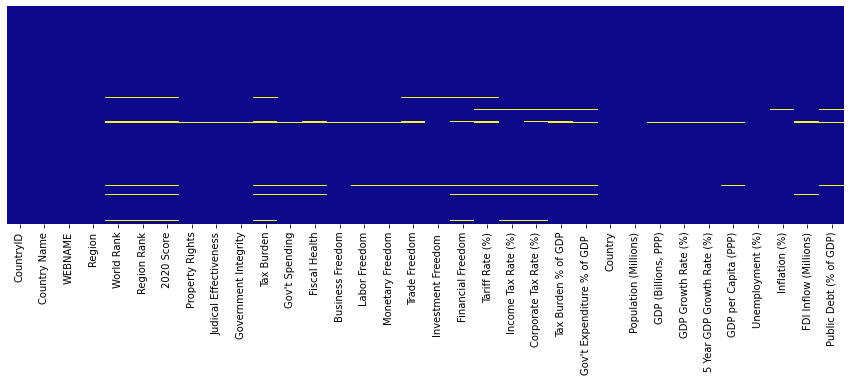

In [44]:
# Visualise missing data
fig, ax = plt.subplots(figsize=(15,4))
ax = sns.heatmap(efi_2020.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [45]:
# Calculate % of missing data for each column with missing data
print("   Percent of data missing for each column.\n")
print("   Column                            % Missing")
print("   -------------------------------------------")
for col in efi_2020.columns:
    efi_2020_pct_missing_data = round(100 * (efi_2020[col].isnull().sum()/len(efi_2020)), 2)
    if efi_2020_pct_missing_data > 0:
        print("  ",col, " "*(35-len(col)),efi_2020_pct_missing_data)

   Percent of data missing for each column.

   Column                            % Missing
   -------------------------------------------
   World Rank                           3.23
   Region Rank                          3.23
   2020 Score                           3.23
   Property Rights                      0.54
   Judical Effectiveness                0.54
   Government Integrity                 0.54
   Tax Burden                           3.23
   Gov't Spending                       1.61
   Fiscal Health                        2.15
   Business Freedom                     0.54
   Labor Freedom                        1.08
   Monetary Freedom                     1.08
   Trade Freedom                        2.15
   Investment Freedom                   1.08
   Financial Freedom                    2.69
   Tariff Rate (%)                      3.23
   Income Tax Rate (%)                  2.15
   Corporate Tax Rate (%)               2.69
   Tax Burden % of GDP                  2.69
   Gov

In [46]:
# Create empty dict to store indexes and amount of null values for each index
efi_2020_null_dict = {}
for row in efi_2020.index:
    efi_2020_null_dict[row] = efi_2020.loc[efi_2020.index[row]].isnull().sum()
    
# Filter out those rows which have at least one null value
efi_2020_null_vals_row_check = {k:v for (k,v) in efi_2020_null_dict.items() if v > 0}

# Calculate percentage of missing data for each row with atleast one missing value
efi_2020_null_vals_row_pct = {k:str(round(100 * (v/(len(efi_2020.columns))),2)) + '%' for (k,v) in efi_2020_null_vals_row_check.items()}

# Find countries who are missing more than 10% of data
efi_2020_countries_over_10pct_missing = [k for (k,v) in efi_2020_null_vals_row_pct.items() if float(v[:-1]) > 10.00]
efi_2020.loc[efi_2020_countries_over_10pct_missing][['Country Name']]

Country Name
78            Iraq
88   Korea, North 
98           Libya
99   Liechtenstein
153        Somalia
161          Syria
183          Yemen

Once again, we drop these 7 countries that have more than 10% of missing data.

In [47]:
# Drop all of these countries from the dataset and reset index
efi_2020.drop(efi_2020_countries_over_10pct_missing, inplace=True)
efi_2020.reset_index(drop=True, inplace=True)

In [48]:
# Remaining null values
efi_2020.isnull().sum().sum()

0

In [49]:
# Check to see if 'Country Name' column matches exactly with 'Country' column
efi_2020_country_matches = np.where(efi_2020['Country Name'] == efi_2020['Country'], 'True', 'False')
efi_2020_mismatches = str(np.count_nonzero(efi_2020_country_matches == 'False')) + ' out of ' + str(len(efi_2020_country_matches))
print(efi_2020_mismatches)

4 out of 179


In [50]:
# Find indexes where data does not match
efi_2020_unequal_country_vals = efi_2020.index[efi_2020['Country Name'] != efi_2020['Country']].tolist()

# Look at rows where data does not match
efi_2020_country_cols = ['Country Name', 'Country']
efi_2020.loc[efi_2020_unequal_country_vals][efi_2020_country_cols]

Country Name          Country
72         Hong Kong    Hong Kong SAR
91              Laos       Lao P.D.R.
99   North Macedonia        Macedonia
146         Slovakia  Slovak Republic

Like the previous datasets, we can drop redundant columns, clean values and convert to numeric data types.

In [51]:
# Remove columns that contain the same information as 'Country Name' column
efi_2020.drop(['CountryID','WEBNAME', 'Country'], axis = 1, inplace=True)

# Remove whitespace from column names
efi_2020.columns = efi_2020.columns.str.strip()

# Remove currency symbol, commas and whitespace from values in 'GDP (Billions, PPP)' column
efi_2020['GDP (Billions, PPP)'] = efi_2020['GDP (Billions, PPP)'].str.replace('$', '')
efi_2020['GDP (Billions, PPP)'] = efi_2020['GDP (Billions, PPP)'].str.replace(',', '')

# Convert 'GDP (Billions, PPP)' values to float
efi_2020['GDP (Billions, PPP)'] = efi_2020['GDP (Billions, PPP)'].astype('float64')

# Remove dollars and commas from values in 'GDP per Capita (PPP)' column
efi_2020['GDP per Capita (PPP)'] = efi_2020['GDP per Capita (PPP)'].str.replace('$', '')
efi_2020['GDP per Capita (PPP)'] = efi_2020['GDP per Capita (PPP)'].str.replace(',', '')
efi_2020['GDP per Capita (PPP)'] = pd.to_numeric(efi_2020['GDP per Capita (PPP)'])

# Remove commas from 'FDI Inflow (Millions)' column
efi_2020['FDI Inflow (Millions)'] = efi_2020['FDI Inflow (Millions)'].str.replace(',', '')

# Convert 'FDI Inflow (Millions)' to float values
efi_2020['FDI Inflow (Millions)'] = efi_2020['FDI Inflow (Millions)'].astype('float64')

In [52]:
# Check info for entire dataset
efi_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country Name                179 non-null    object 
 1   Region                      179 non-null    object 
 2   World Rank                  179 non-null    float64
 3   Region Rank                 179 non-null    float64
 4   2020 Score                  179 non-null    float64
 5   Property Rights             179 non-null    float64
 6   Judical Effectiveness       179 non-null    float64
 7   Government Integrity        179 non-null    float64
 8   Tax Burden                  179 non-null    float64
 9   Gov't Spending              179 non-null    float64
 10  Fiscal Health               179 non-null    float64
 11  Business Freedom            179 non-null    float64
 12  Labor Freedom               179 non-null    float64
 13  Monetary Freedom            179 non

<a id="efi_2018_2019_2020_cleaning"></a>
### 5iv. Economic Freedom Index 2018, 2019 and 2020
---

In [53]:
# Change country names to ensure EFI datasets match across all three years

# Macedonia to North Macedonia
efi_2018.loc[efi_2018['Country Name'] == 'Macedonia', 'Country Name'] = 'North Macedonia'
efi_2019.loc[efi_2019['Country Name'] == 'Macedonia', 'Country Name'] = 'North Macedonia'

# Swaziland to Eswatini
efi_2018.loc[efi_2018['Country Name'] == 'Swaziland', 'Country Name'] = 'Eswatini'

<a id="efw_2020_cleaning"></a>
### 5v. Economic Freedom of the World 2020 (2018)
---

For the Economic Freedom of the World 2020 dataset, the data only goes up to 2018. This may be because the data takes longer to analyse and publish than the data in the Economic Freedom Index datasets. As we are only interested in the most recent data, we will pull out only the values for 2018.

We will also pull out only the important columns which contain the summary scores for each area. There is a summary dataset available for the Economic Freedom of the World 2020 which contains most of these figures, however, it does not include the rank and quartile (which we want to make use of later) therefore we will use this full dataset instead.

Because it may be confusing that the dataset was published in 2020 and contains data only up to 2018, we will label all variables that reference this dataset with 2018. This will avoid any confusion when we compare it to the Economic Freedom Index datasets later in the analysis.

In [54]:
# Extract just the 2018 figures (The report is 2020 but data only goes up to year 2018)
efw_2018  = efw_2020[efw_2020.year == 2018]

# Check shape
print('Rows: {} \n\nColumns: {}'.format(efw_2018.shape[0], efw_2018.shape[1]))

Rows: 162 

Columns: 35


In [55]:
# Filter out most important columns
efw_2018 = efw_2018[['iso_code', 
                   'countries', 
                   'economic_freedom_summary_index',
                   'rank', 
                   'quartile', 
                   '1_size_of_government', 
                   '2_legal_system_&_property_rights', 
                   '3_sound_money', 
                   '4_freedom_to_trade_internationally', 
                   '5_regulation',
]]

# Rename columns in EFW dataset to improve readability
efw_2018.rename(columns={
                         "iso_code": "ISO Code",
                         "countries": "Countries",
                         "rank": "World Rank",
                         "quartile": "Quartile",
                         "economic_freedom_summary_index": "Economic Freedom Summary Score",
                         "1_size_of_government": "Size of Government",
                         "2_legal_system_&_property_rights": "Legal System & Property Rights",
                         "3_sound_money": "Sound Money",
                         "4_freedom_to_trade_internationally": "Freedom to Trade Internationally",
                         "5_regulation": "Regulation",
}, inplace=True)

# Convert quartile to int
efw_2018['Quartile'] = efw_2018['Quartile'].astype('int64')

In [56]:
# Check info to ensure data is clean
efw_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ISO Code                          162 non-null    object 
 1   Countries                         162 non-null    object 
 2   Economic Freedom Summary Score    162 non-null    float64
 3   World Rank                        162 non-null    float64
 4   Quartile                          162 non-null    int64  
 5   Size of Government                162 non-null    float64
 6   Legal System & Property Rights    162 non-null    float64
 7   Sound Money                       162 non-null    float64
 8   Freedom to Trade Internationally  162 non-null    float64
 9   Regulation                        162 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 13.9+ KB


**[Back to Top](#top)** <br>

<a id="data_prep_for_eda"></a>
## 6. Data Prep for EDA
---

Here, we will prepare the data for the EDA by creating various functions and variables that will allow us to:

- Map ISO codes to EFI datasets

- Calculate and assign quartile ranks to EFI datasets

- Compare relevant numerical data with world averages and quartile averages

- Plot graphs and charts to compare values within the datasets

- Tidy up some of the data so that it is consistent across datasets

- Plot and analyse correlations amongst the data

- Display data geographically based on quartile

**[Skip to EDA](#eda)** <br>

In [57]:
# List of EFI datasets
efi_data_list = [efi_2018, efi_2019, efi_2020]

# Map ISO codes to all EFI data
def map_iso(efi_data_list):
    for df in efi_data_list:
        df['ISO Code'] = df['Country Name'].map(iso_3.set_index('Country')['Alpha-3 code'])
        
map_iso(efi_data_list)

In [58]:
# Calculate quartiles for each EFI dataset and assign them

def assign_quartiles(efi_data_list):
    
    """Calculate quartiles for each EFI dataset and assign countries their quartile rank"""
    
    for df in efi_data_list:
        
        # Calculate quartiles
        first_quartile = round(df.shape[0]/4)
        second_quartile = first_quartile*2
        third_quartile = first_quartile*3

        def assign_quartile_rank(world_rank):
            if world_rank <= first_quartile:
                return 1
            elif world_rank in range(first_quartile+1, second_quartile+1):
                return 2
            elif world_rank in range(second_quartile+1, third_quartile+1):
                return 3
            else:
                return 4

        df['Quartile'] = df['World Rank'].apply(assign_quartile_rank)

assign_quartiles(efi_data_list)

In [59]:
# Display country values alongside world averages
def compare_with_world_averages(data, country_name):
    
    """Display country values alongside world averages and the percent difference"""
    
    if data.size > 5000:
        
        # For EFI datasets
        dataset_name = 'EFI'
        year = data.columns[4].split(' ')[0]
        efi_no_comparison = ['Region', 'World Rank', 'Region Rank', f'{year} Score', 'Population (Millions)', 'ISO Code', 'Quartile']
        comparison_data = data.drop(columns=efi_no_comparison)
        country = comparison_data.loc[comparison_data['Country Name'] == country_name]
        
    elif data.size < 2000:
        
        # For EFW dataset
        dataset_name = 'EFW'
        year = 2018
        efw_no_comparison = ['ISO Code', 'Economic Freedom Summary Score', 'World Rank', 'Quartile']
        comparison_data = data.drop(columns=efw_no_comparison)
        country = comparison_data.loc[comparison_data['Countries'] == country_name]
    

    print(f"   {dataset_name} Values for [{country_name}] Compared to Worldwide Averages in {year}.\n\n")
    print("   Measures                             Country            World Averages        % Difference")
    print("   ------------------------------------------------------------------------------------------")
    
    for col in country:
        country_val = country.iloc[0][col]
        try:
            world_mean = round(data[col].mean(),2)
        except:
            world_mean = "-"
        try:
            pct_diff = round((((country_val-world_mean)/world_mean)*100),2)
        except:
            pct_diff = "-"
        print("  ",col, " "*(37-len(col)),country_val,
                        " "*(20-len(str(country_val))),world_mean,
                        " "*(20-len(str(world_mean))),pct_diff)

In [60]:
# Display country values alongside quartile averages
def compare_with_quartile_averages(data, country_name):
    
    """Display country values alongside quartile averages and the percent difference"""
    
    if data.size > 5000:
        
        # For EFI datasets
        dataset_name = 'EFI'
        year = data.columns[4].split(' ')[0]
        quartile = data.loc[data['Country Name'] == country_name]['Quartile'].values[0]
        efi_no_comparison = ['Region', 'World Rank', 'Region Rank', f'{year} Score', 'Population (Millions)', 'ISO Code', 'Quartile']
        comparison_data = data.drop(columns=efi_no_comparison)
        country = comparison_data.loc[comparison_data['Country Name'] == country_name]
        quartile_data = data.loc[data['Quartile'] == quartile]
        
    elif data.size < 2000:
        
        # For EFW dataset
        dataset_name = 'EFW'
        year = 2018
        quartile = int(data.loc[data['Countries'] == country_name]['Quartile'].values[0])
        efw_no_comparison = ['ISO Code', 'Economic Freedom Summary Score', 'World Rank', 'Quartile']
        comparison_data = data.drop(columns=efw_no_comparison)
        country = comparison_data.loc[comparison_data['Countries'] == country_name]
        quartile_data = data.loc[data['Quartile'] == quartile]

    print(f"   {dataset_name} Values for [{country_name}] Compared to Quartile {quartile} Averages in {year}.\n\n")
    print(f"   Measures                              Country         Quartile {quartile} Averages      % Difference")
    print("   --------------------------------------------------------------------------------------------")
    
    for col in country:
        country_val = country.iloc[0][col]
        try:
            quartile_mean = round(quartile_data[col].mean(),2)
        except:
            quartile_mean = "-"
        try:
            pct_diff = round((((country_val-quartile_mean)/quartile_mean)*100),2)
        except:
            pct_diff = "-"
        print("  ",col, " "*(37-len(col)),country_val,
                        " "*(20-len(str(country_val))),quartile_mean,
                        " "*(20-len(str(quartile_mean))),pct_diff)

In [61]:
# Retrieve column names and percent differences based on quartile averages
def get_quartile_pct_differences(data, country_name):
    
    """Get column's percent differences based on quartile averages"""
    
    pct_differences = []
    
    
    if data.size > 5000:
        
        # For EFI datasets
        quartile = data.loc[data['Country Name'] == country_name]['Quartile'].values[0]
        year = data.columns[4].split(' ')[0]
        efi_no_comparison = ['Country Name', 'Region', 'World Rank', 'Region Rank', f'{year} Score', 'Population (Millions)', 'ISO Code', 'Quartile']
        country = data.loc[data['Country Name'] == country_name].drop(columns=efi_no_comparison)
        col_list = country.columns.tolist()
        quartile_data = data.loc[data['Quartile'] == quartile]
        
    elif data.size < 2000:
        
        # For EFW dataset
        quartile = data.loc[data['Countries'] == country_name]['Quartile'].values[0]
        year = 2018
        efw_no_comparison = ['Countries', 'ISO Code', 'Economic Freedom Summary Score', 'World Rank', 'Quartile']
        country = data.loc[data['Countries'] == country_name].drop(columns=efw_no_comparison)
        col_list = country.columns.tolist()
        quartile_data = data.loc[data['Quartile'] == quartile]


    for col in country:
        country_val = country.iloc[0][col]
        quartile_mean = round(quartile_data[col].mean(),2)
        pct_diff = round((((country_val-quartile_mean)/quartile_mean)*100),2)
        pct_differences.append(pct_diff)

    return col_list, pct_differences

In [62]:
# Plot percent differences for country values vs quartile averages
def plot_pct_diff_quartile(data, country_name):

    """Plots a barplot with the percent difference from the quartile average for each measure of a given country"""
    
    
    if data.size > 5000:
        
        # For EFI datasets
        dataset_name = 'EFI'
        quartile = data.loc[data['Country Name'] == country_name]['Quartile'].values[0]
        year = data.columns[4].split(' ')[0]
        

    elif data.size < 2000:
        
        # For EFW dataset
        dataset_name = 'EFW'
        quartile = int(data.loc[data['Countries'] == country_name]['Quartile'].values[0])
        year = 2018
     

    # Plot setup
    fig, ax = plt.subplots(figsize=(10,5) if dataset_name == 'EFW' else (15,10)) 

    # Plot gridlines
    ax.axhline(0, color='black')
    for x in np.arange(0.5, 4.5 if dataset_name == 'EFW' else 24.5, 1):
        ax.axvline(x, color='black', linewidth=0.2)
    ax.grid(axis='y')
    ax.set_axisbelow(True)

    # Format tick labels
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100, decimals=0))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(5 if dataset_name == 'EFW' else 25))
    ax.set_ylabel('Percent Difference from Quartile Averages', labelpad=10)
    plt.setp(ax.get_xticklabels(), rotation=90)
    
    # Title
    fig.suptitle(f'Percent Difference From The Quartile {quartile} Averages For Each Measure In The {dataset_name} Dataset\n \
    \n[{country_name} - {year}]', fontsize=15, y=1.12 if dataset_name == 'EFW' else 1)
   
    # Get x (columns) and y (percent difference from quartile average) data
    x, y = get_quartile_pct_differences(data, country_name)

    # Define colour palette
    norm = TwoSlopeNorm(vmin=min(y), vcenter=0, vmax=max(y))
    colors = [plt.cm.RdYlGn(norm(c)) for c in y]

    # Plot graph
    sns.barplot(x=x, y=y, palette=colors, edgecolor='black', linewidth=0.5)

    plt.show()

In [63]:
# Plot top ten and bottom ten countries for the given dataset
def top_and_bottom_ten(data):
    
    """Plot two barplots showing the top 10 and bottom 10 countries for the given dataset"""
    
    
    if data.size > 5000:
        
        #EFI dataset
        dataset_name = 'EFI'
        year = data.columns[4].split(' ')[0]
        top_ten = data.sort_values(['World Rank'])[['Country Name', 'World Rank', f'{year} Score']].head(10)
        bottom_ten = data.sort_values(['World Rank'])[['Country Name', 'World Rank', f'{year} Score']].tail(10)
        country_name = 'Country Name'
        world_rank = f'{year} Score'
        
    elif data.size < 2000:
        
        # EFW dataset
        dataset_name = 'EFW'
        year = 2018
        top_ten = data.sort_values(['World Rank'])[['Countries', 'World Rank', 'Economic Freedom Summary Score']].head(10)
        bottom_ten = data.sort_values(['World Rank'])[['Countries', 'World Rank', 'Economic Freedom Summary Score']].tail(10)
        country_name = 'Countries'
        world_rank = 'Economic Freedom Summary Score'
        
    
    # Plot setup
    fig, axs = plt.subplots(2, 1, figsize=(15,10))
    fig.subplots_adjust(hspace=0.7)
    
    # Title
    fig.suptitle(f'\nTop 10 and Bottom 10 Countries Based on {dataset_name} Score ({year})', fontsize=15)
    
    # Adjust axs 
    for ax in range(0, 2):
        plt.setp(axs[ax].get_xticklabels(), rotation=45)
        axs[ax].set_ylim([0, 10] if dataset_name == 'EFW' else [0, 100])
        axs[ax].grid(axis='y')
        axs[ax].set_axisbelow(True)
    
    # Ax title
    axs[0].set(title=f'{year} Score for Top 10 Countries')
    axs[1].set(title=f'{year} Score for Bottom 10 Countries')

    # Plot
    sns.barplot(x=country_name, y=world_rank, data=top_ten, palette="Blues_r", ax=axs[0])
    sns.barplot(x=country_name, y=world_rank, data=bottom_ten, palette="Reds", ax=axs[1])
    
    # Adjust axis labels
    for ax in range(0, 2):
        axs[ax].set_xlabel('')
        axs[ax].set_ylabel(f'{dataset_name} Score', labelpad=10)

    plt.show()

In [64]:
# Display heatmapmap
def show_correlation(data):
    
    """ Show Heatmap for EFI"""

    
    if data.size > 5000:
        
        # EFI dataset
        dataset_name = 'EFI'
        year = data.columns[4].split(' ')[0]
        data_corr = data.drop(columns=['Region', 'Region Rank']).corr()
    
    elif data.size < 2000:
        
        #EFW dataset
        dataset_name = 'EFW'
        year = 2018
        data_corr = data.drop(columns=['ISO Code']).corr()
    
    
    # Set theme style
    sns.set_theme(style="white")

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(data_corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    # Title
    ax.set_title(f'Correlational Analysis for {dataset_name} {year}', fontsize=15)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(data_corr, mask=mask, cmap=cmap, annot=True if dataset_name == 'EFW' else False,
                vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [65]:
# Display scatter plot for freedom measures based on quartile averages for EFI
def scatter_quartile_averages_freedom_efi(data):
    
    """Display a scatterplot to show the relationships between score and EFI freedom measures"""
    
    # Extract year
    year = data.columns[4].split(' ')[0]
    year_score = data.columns[4]
    
    # Plot setup
    fig, axs = plt.subplots(3, 2, figsize=(15,15))

    # Title
    fig.suptitle(f'The Relationship Between Score and EFI Freedom Measures\n\nFor {year}', fontsize=15, y=0.95)
    fig.subplots_adjust(hspace=0.3)

    # Plot gridlines
    for idx1 in range(0,3):
        for idx2 in range(0,2):
            axs[idx1][idx2].grid(axis='y')
            axs[idx1][idx2].set_axisbelow(True)
            
    # Plot
    sns.scatterplot(x='Business Freedom', y=year_score, data=data, s=50,
                    hue='Quartile', palette=["#32b166", "#dbc257", "#4c72b0", "#c44e52"], ax=axs[0][0])

    sns.scatterplot(x='Labor Freedom', y=year_score, data=data, s=50,
                    hue='Quartile', palette=["#32b166", "#dbc257", "#4c72b0", "#c44e52"], ax=axs[0][1])

    sns.scatterplot(x='Monetary Freedom', y=year_score, data=data, s=50,
                    hue='Quartile', palette=["#32b166", "#dbc257", "#4c72b0", "#c44e52"], ax=axs[1][0])

    sns.scatterplot(x='Trade Freedom', y=year_score, data=data, s=50,
                    hue='Quartile', palette=["#32b166", "#dbc257", "#4c72b0", "#c44e52"], ax=axs[1][1])

    sns.scatterplot(x='Financial Freedom', y=year_score, data=data, s=50,
                    hue='Quartile', palette=["#32b166", "#dbc257", "#4c72b0", "#c44e52"], ax=axs[2][0])

    sns.scatterplot(x='Investment Freedom', y=year_score, data=data, s=50,
                    hue='Quartile', palette=["#32b166", "#dbc257", "#4c72b0", "#c44e52"], ax=axs[2][1])
    
    plt.show()

In [66]:
# Display scatter plot for fiscal measures based on quartile averages for EFI
def scatter_quartile_averages_fiscal_efi(data):
    
    """Display a scatterplot to show the relationships between score and EFI fiscal measures"""
    
    # Extract year
    year = data.columns[4].split(' ')[0]
    year_score = data.columns[4]

    # Plot setup
    fig, axs = plt.subplots(3, 2, figsize=(15,15))

    # Title
    fig.suptitle(f'The Relationship Between Score and EFI Fiscal Measures\n\nFor {year}', fontsize=15, y=0.95)
    fig.subplots_adjust(hspace=0.3)

    # Adjust width of last plot
    axs[2][0] = plt.subplot2grid((3, 2), (2, 0), colspan=2)

    # Plot gridlines
    for idx1 in range(0,3):
        for idx2 in range(0,2):
            axs[idx1][idx2].grid(axis='y')
            axs[idx1][idx2].set_axisbelow(True)

    # Plot
    sns.scatterplot(x="Gov't Spending", y=year_score, data=data, s=50,
                    hue='Quartile', palette=["#32b166", "#dbc257", "#4c72b0", "#c44e52"], ax=axs[0][0])

    sns.scatterplot(x="Gov't Expenditure % of GDP", y=year_score, data=data, s=50,
                    hue='Quartile', palette=["#32b166", "#dbc257", "#4c72b0", "#c44e52"], ax=axs[0][1])

    sns.scatterplot(x="GDP per Capita (PPP)", y=year_score, data=data, s=50,
                    hue='Quartile', palette=["#32b166", "#dbc257", "#4c72b0", "#c44e52"], ax=axs[1][0])

    sns.scatterplot(x="Unemployment (%)", y=year_score, data=data, s=50,
                    hue='Quartile', palette=["#32b166", "#dbc257", "#4c72b0", "#c44e52"], ax=axs[1][1])

    sns.scatterplot(x="Inflation (%)", y=year_score, data=data, s=50,
                    hue='Quartile', palette=["#32b166", "#dbc257", "#4c72b0", "#c44e52"], ax=axs[2][0])
    
    plt.show()

In [67]:
# Display scatter plot for summary measures based on quartile averages for EFW
def scatter_quartile_averages_efw(data):
    
    """Display a scatterplot to show the relationships between score and EFW measures"""
    
    # Plot setup
    fig, axs = plt.subplots(3, 2, figsize=(15,15))

    # Title
    fig.suptitle('The Relationship Between Score and Different Measures\n\nFor EFW 2018', fontsize=15, y=0.95)
    fig.subplots_adjust(hspace=0.3)
    
    # Adjust width of last plot
    axs[2][0] = plt.subplot2grid((3, 2), (2, 0), colspan=2)

    # Plot gridlines
    for idx1 in range(0,3):
        for idx2 in range(0,2):
            axs[idx1][idx2].grid(axis='y')
            axs[idx1][idx2].set_axisbelow(True)


    # Plot
    sns.scatterplot(x="Size of Government", y='Economic Freedom Summary Score', data=data, s=50,
                    hue='Quartile', palette=["#32b166", "#dbc257", "#4c72b0", "#c44e52"], ax=axs[0][0])

    sns.scatterplot(x="Legal System & Property Rights", y='Economic Freedom Summary Score', data=data, s=50,
                    hue='Quartile', palette=["#32b166", "#dbc257", "#4c72b0", "#c44e52"], ax=axs[0][1])

    sns.scatterplot(x="Sound Money", y='Economic Freedom Summary Score', data=data, s=50,
                    hue='Quartile', palette=["#32b166", "#dbc257", "#4c72b0", "#c44e52"], ax=axs[1][0])

    sns.scatterplot(x="Freedom to Trade Internationally", y='Economic Freedom Summary Score', data=data, s=50,
                    hue='Quartile', palette=["#32b166", "#dbc257", "#4c72b0", "#c44e52"], ax=axs[1][1])

    sns.scatterplot(x="Regulation", y='Economic Freedom Summary Score', data=data, s=50,
                    hue='Quartile', palette=["#32b166", "#dbc257", "#4c72b0", "#c44e52"], ax=axs[2][0])

    plt.show()

In [68]:
# Display world choropleth map
def show_world_choropleth(data):
    
    """Create Choropleth Map of World for EFI"""
    
    if data.size > 5000:
        dataset_name = 'Economic Freedom Index'
        iso = 'ISO Code'
        quartile = 'Quartile'
        country_name = 'Country Name'
        year = data.columns[4].split(' ')[0]
    
    elif data.size < 2000:
        dataset_name = 'Economic Freedom of the World'
        iso = 'ISO Code'
        quartile = 'Quartile'
        country_name = 'Countries'
        year = 2018
    
    # Plot map
    fig = go.Figure(data=go.Choropleth(
        locations = data[iso],
        z = data[quartile],
        text = data[country_name],
        colorscale = 'emrld',
        autocolorscale=False,
        reversescale=False,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_title = quartile,
    ))

    fig.update_layout(
        title_text=f'{year} {dataset_name}',
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type='equirectangular'
        ),

    )

    fig.show()

**[Back to Top](#top)** <br>

<a id="eda"></a>
## 7. Exploratory Data Analysis
---

Now we have completed the setup for the EDA, we can explore some of the data from each dataset and make some observations.

**7i. [Economic Freedom Index 2018](#efi_2018_eda)** <br>
**7ii. [Economic Freedom Index 2019](#efi_2019_eda)** <br>
**7iii. [Economic Freedom Index 2020](#efi_2020_eda)** <br>
**7iv. [Economic Freedom of the World 2020 (2018)](#efw_2020_eda)** <br>

<a id="efi_2018_eda"></a>
### 7i. Economic Freedom Index 2018
---

In [69]:
# Compare Germany against world averages for 2018 (EFI)
compare_with_world_averages(efi_2018, 'Germany')

   EFI Values for [Germany] Compared to Worldwide Averages in 2018.


   Measures                             Country            World Averages        % Difference
   ------------------------------------------------------------------------------------------
   Country Name                           Germany               -                     -
   Property Rights                        81.0                  52.35                 54.73
   Judical Effectiveness                  78.0                  47.91                 62.81
   Government Integrity                   75.3                  42.72                 76.26
   Tax Burden                             61.3                  77.04                 -20.43
   Gov't Spending                         41.3                  64.24                 -35.71
   Fiscal Health                          90.8                  67.89                 33.75
   Business Freedom                       86.1                  65.23                 31.99
   Labor

Here we can see how Germany scores for each measure compared to the world averages for 2018. However, as Germany is a relatively wealthy country compared to the rest of the world, the averages are somewhat skewed by all of the other less wealthier countries. To get more of an understanding of how well Germany scores amongst similar countries, we have to compare Germany against world averages based on the quartile they fall within, which in this case is 1.

In [70]:
# Compare Germany against quartile averages for 2018 (EFI)
compare_with_quartile_averages(efi_2018, 'Germany')

   EFI Values for [Germany] Compared to Quartile 1 Averages in 2018.


   Measures                              Country         Quartile 1 Averages      % Difference
   --------------------------------------------------------------------------------------------
   Country Name                           Germany               -                     -
   Property Rights                        81.0                  76.12                 6.41
   Judical Effectiveness                  78.0                  70.35                 10.87
   Government Integrity                   75.3                  66.37                 13.45
   Tax Burden                             61.3                  75.69                 -19.01
   Gov't Spending                         41.3                  60.91                 -32.2
   Fiscal Health                          90.8                  86.7                  4.73
   Business Freedom                       86.1                  79.19                 8.73
   Labor

Here we can see that the difference from the quartile average is much more balanced giving us a better indication of how Germany scores amongst similar countries. A quick observation shows that even against the quartile averages, Germany maintains a much lower than average inflation rate and more than 250% above average for GDP (Billions, PPP).

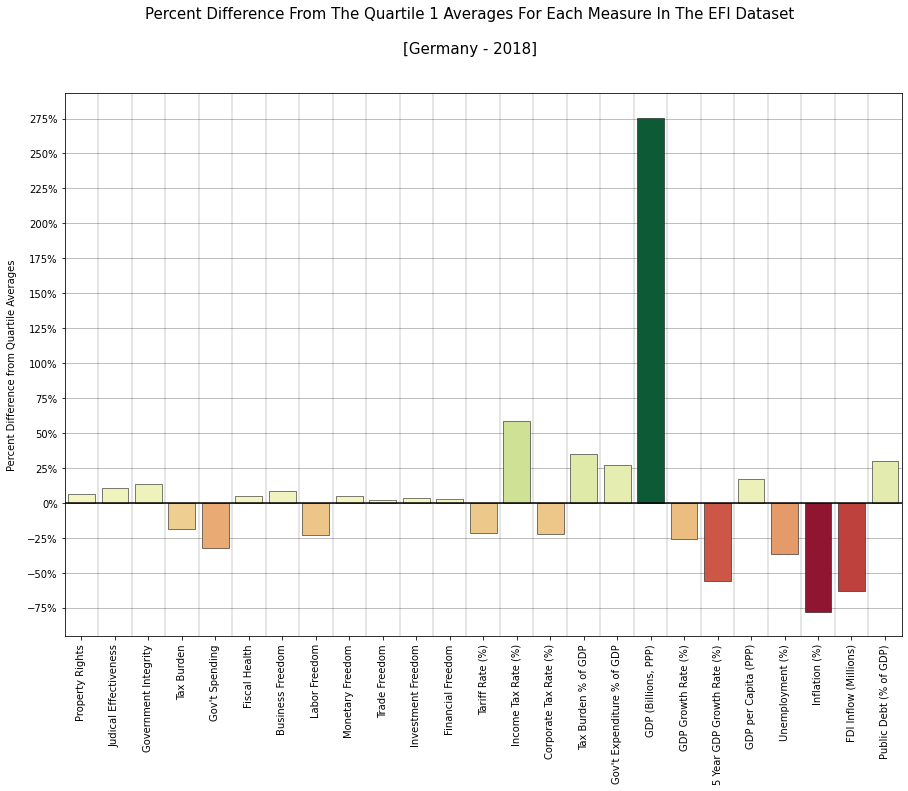

In [71]:
# Display the percent difference from the quartile average for Germany in EFI 2018
plot_pct_diff_quartile(efi_2018, 'Germany')

Here we can see a visualisation of the percent difference from the quartile average for Germany. This makes it much easier to see the size of the difference. Like we mentioned above, Germany's inflation is particularly low compared to the quartile average whereas GDP (Billions, PPP) is much higher.

In [72]:
# Compare Mexico against world averages for 2018 (EFI)
compare_with_world_averages(efi_2018, 'Mexico')

   EFI Values for [Mexico] Compared to Worldwide Averages in 2018.


   Measures                             Country            World Averages        % Difference
   ------------------------------------------------------------------------------------------
   Country Name                           Mexico                -                     -
   Property Rights                        58.6                  52.35                 11.94
   Judical Effectiveness                  39.0                  47.91                 -18.6
   Government Integrity                   26.9                  42.72                 -37.03
   Tax Burden                             75.7                  77.04                 -1.74
   Gov't Spending                         78.1                  64.24                 21.58
   Fiscal Health                          69.8                  67.89                 2.81
   Business Freedom                       67.5                  65.23                 3.48
   Labor Fre

Here we can see how Mexico scores for each measure compared to the world averages for 2018. However, as mentioned before, to get a better understanding of how well Mexico scores amongst similar countries, we have to compare it against world averages based on the quartile Mexico falls within, which in this case is 2.

In [73]:
# Compare Mexico against quartile averages for 2018 (EFI)
compare_with_quartile_averages(efi_2018, 'Mexico')

   EFI Values for [Mexico] Compared to Quartile 2 Averages in 2018.


   Measures                              Country         Quartile 2 Averages      % Difference
   --------------------------------------------------------------------------------------------
   Country Name                           Mexico                -                     -
   Property Rights                        58.6                  57.15                 2.54
   Judical Effectiveness                  39.0                  48.96                 -20.34
   Government Integrity                   26.9                  42.08                 -36.07
   Tax Burden                             75.7                  78.22                 -3.22
   Gov't Spending                         78.1                  62.5                  24.96
   Fiscal Health                          69.8                  74.48                 -6.28
   Business Freedom                       67.5                  68.59                 -1.59
   Lab

When Mexico is compared against the quartile averages, we can see that it receives significantly more FDI (Millions) than other countries in the same quartile. Like Germany, it also has a much higher than average GDP (Billions, PPP). Unlike Germany, Mexico's inflation rate seems to be particularly high compared to the quartile average. We can see this better by creating a barplot.

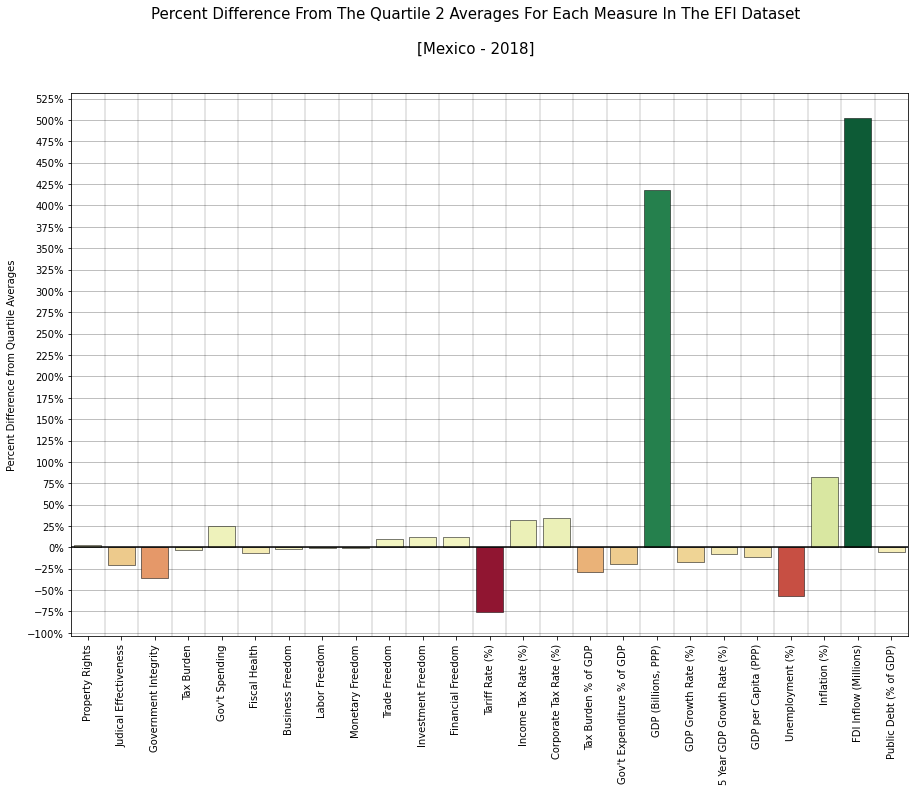

In [74]:
# Display the percent difference from the quartile average for Mexico in EFI 2018
plot_pct_diff_quartile(efi_2018, 'Mexico')

Along with the high inflation, we can also see that Mexico receives much more FDI on average than other countries in the same quartile.

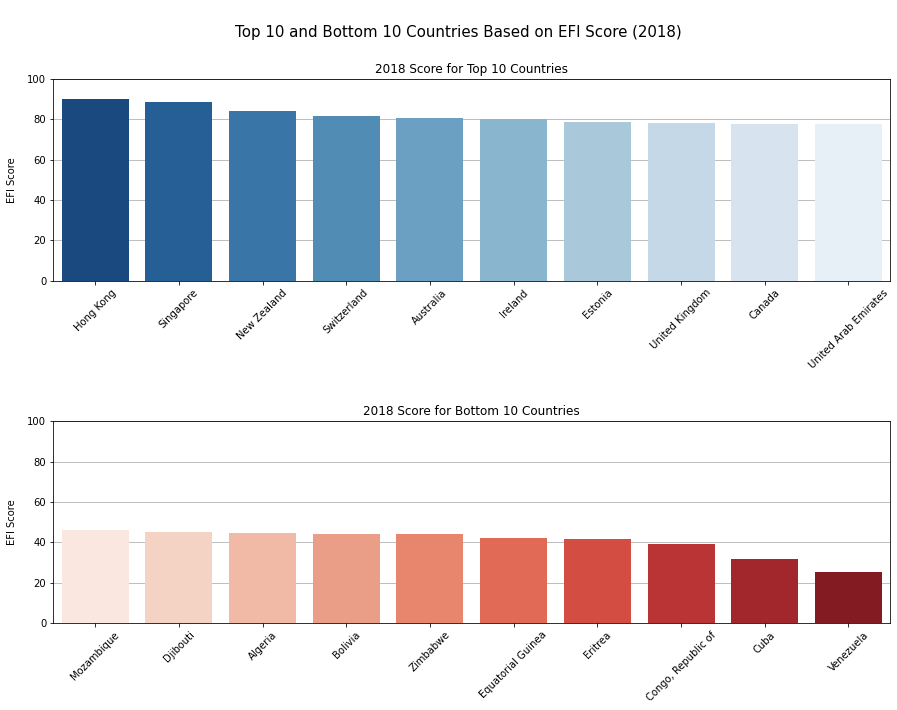

In [75]:
# Plot graph to see visual representation of scores for top 10 and bottom 10 countries for 2018 (EFI)
top_and_bottom_ten(efi_2018)

Here we can see the top 10 and bottom 10 countries from the EFI 2018 dataset. In the top 10, Hong Kong and Singapore score highly with New Zealand not far off. Switzerland up to United Arab Emirates score slightly lower but seem to score very similarly. In the bottom 10, Cuba and Venezuela seem to be particularly low-scoring.

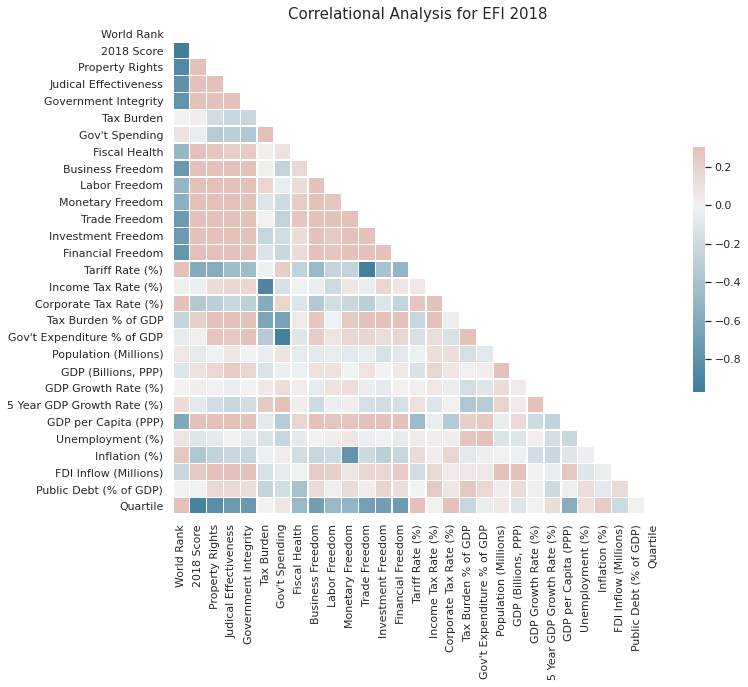

In [76]:
# Correlation plot for EFI 2018
show_correlation(efi_2018)

Here, we see the correlations between the different measures for EFI 2018.

One important point here is that Gov't Expenditure % of GDP shows a strong negative correlation with Gov't Spending. This is because Gov't Spending is not measured by the amount a goverment has spent but is in fact the score given for that measure (lower scores indicate higher government spending). Therefore countries where we typically think of as more egalitarian such as Denmark, Norway and Finland who have large governments and more social systems in place score very low on this measure. Knowing this, we can see that there is a slight positive correlation between Gov't Spending and World Rank, indicating that the more the government spends, the more likely it will be that a country is ranked higher.

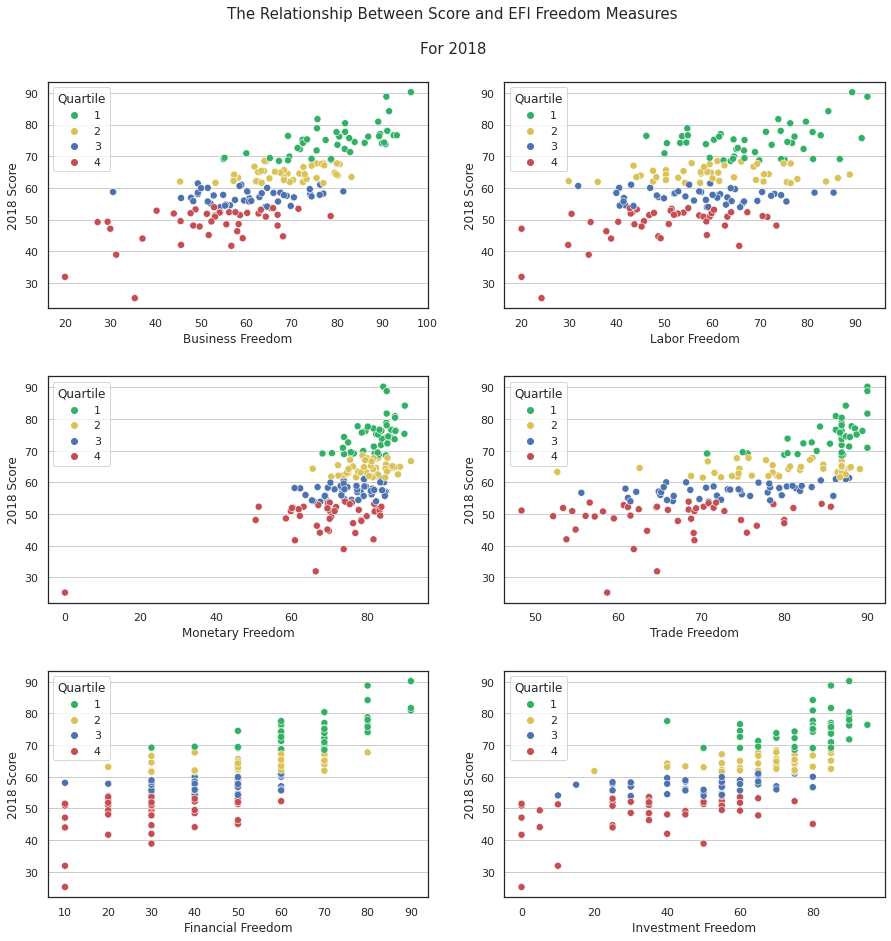

In [77]:
# Scatter plot to show the relationship between the EFI freedom measures and EFI score
scatter_quartile_averages_freedom_efi(efi_2018)

Here we can see that all of the freedom measures are positively correlated with the score.

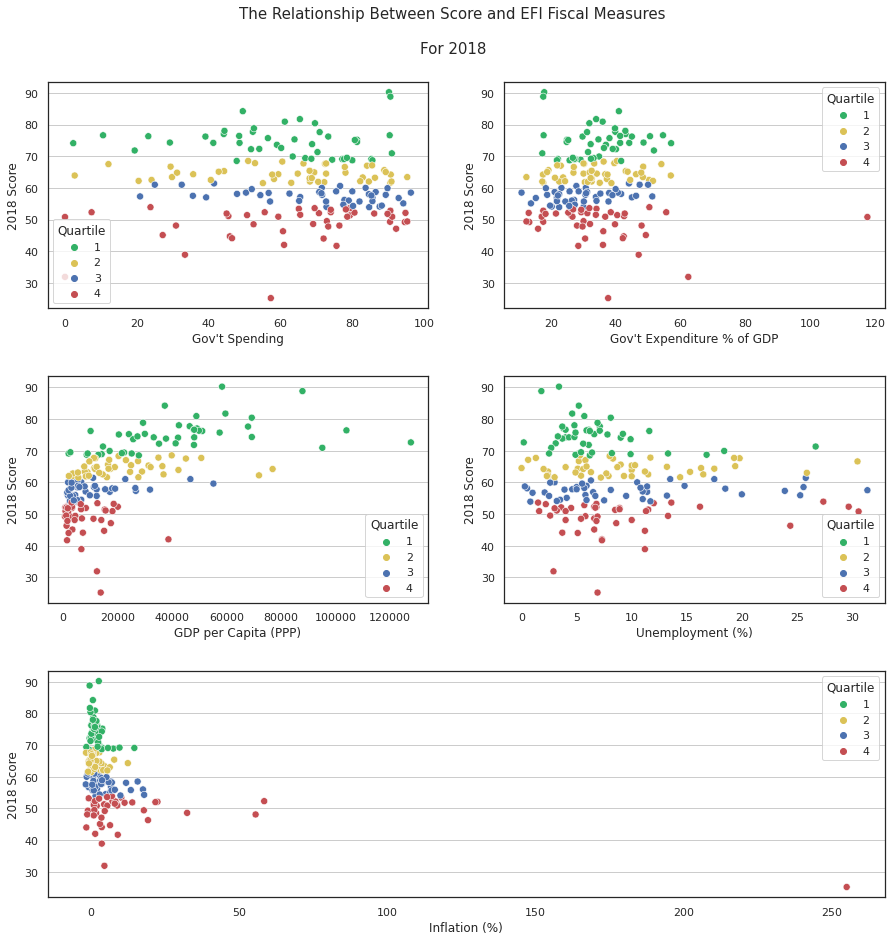

In [78]:
# Scatter plot to show the relationship between the EFI fiscal measures and EFI score
scatter_quartile_averages_fiscal_efi(efi_2018)

For the fiscal measures, the correlations are much weaker, however, we can see that inflation tends to be much more varied in countries that fall in the lower quartiles. We can also see that Unemployment (%) is generally consistent across all quartiles with perhaps countries in quartiles 2 and 3 displaying only slightly more variation.

In [79]:
# Create choropleth map of world 2018 (EFI)
show_world_choropleth(efi_2018)

Here we can see each country from the EFI 2018 with the lighter green indicating a higher rank and the darker green indicating a lower rank. What is interesting here are the small pockets of countries who, surrounded by lower ranking countries, manage to rank highly. For example, Chile, Colombia, Peru, Uruguay, Kazakhstan and Botswana.

<a id="efi_2019_eda"></a>
### 7ii. Economic Freedom Index 2019
---

In [80]:
# Compare Germany against world averages for 2019 (EFI)
compare_with_world_averages(efi_2019, 'Germany')

   EFI Values for [Germany] Compared to Worldwide Averages in 2019.


   Measures                             Country            World Averages        % Difference
   ------------------------------------------------------------------------------------------
   Country Name                           Germany               -                     -
   Property Rights                        79.9                  53.15                 50.33
   Judical Effectiveness                  75.4                  45.76                 64.77
   Government Integrity                   81.3                  42.25                 92.43
   Tax Burden                             60.8                  77.64                 -21.69
   Gov't Spending                         42.3                  64.88                 -34.8
   Fiscal Health                          91.8                  67.29                 36.42
   Business Freedom                       83.3                  64.38                 29.39
   Labor 

Here we can see how Germany scores for each measure compared to the world averages for 2019.

In [81]:
# Compare Germany against quartile averages for 2019 (EFI)
compare_with_quartile_averages(efi_2019, 'Germany')

   EFI Values for [Germany] Compared to Quartile 1 Averages in 2019.


   Measures                              Country         Quartile 1 Averages      % Difference
   --------------------------------------------------------------------------------------------
   Country Name                           Germany               -                     -
   Property Rights                        79.9                  76.91                 3.89
   Judical Effectiveness                  75.4                  66.41                 13.54
   Government Integrity                   81.3                  66.44                 22.37
   Tax Burden                             60.8                  74.96                 -18.89
   Gov't Spending                         42.3                  60.99                 -30.64
   Fiscal Health                          91.8                  88.53                 3.69
   Business Freedom                       83.3                  79.24                 5.12
   Labo

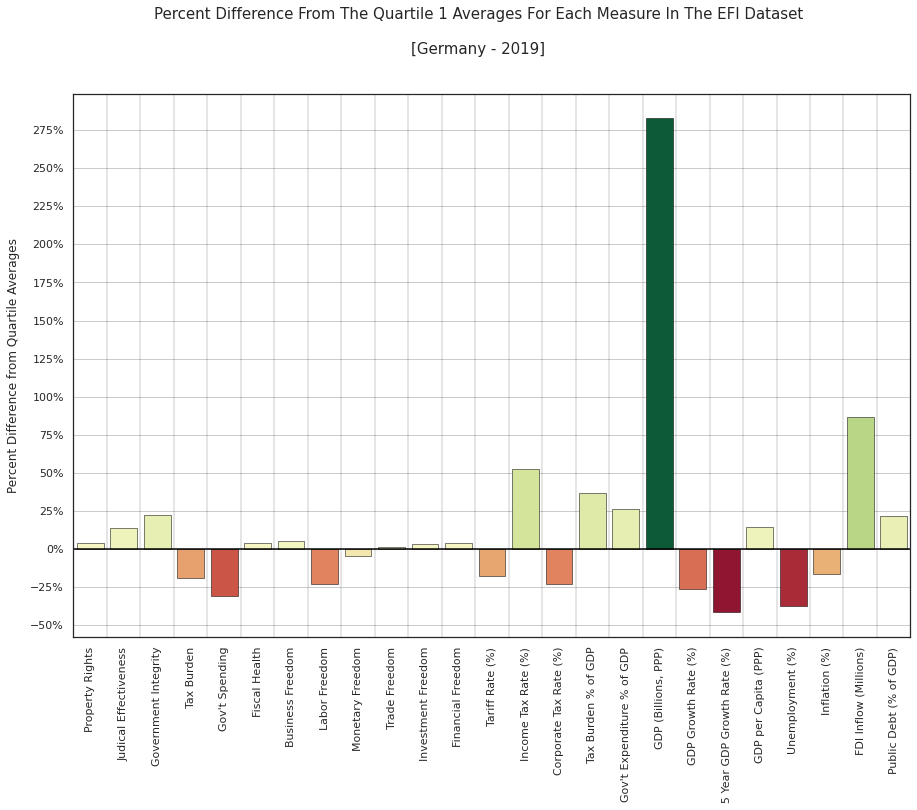

In [82]:
# Display the percent difference from the quartile average for Germany in EFI 2019
plot_pct_diff_quartile(efi_2019, 'Germany')

A quick observation for the comparisons against quartile averages for Germany in 2019 shows that Germany still maintains a higher than average GDP (Billions, PPP), however, its inflation rate is now much closer to the quartile average. Germany's FDI is also much higher than the quartile average as opposed to last year where it was significantly lower than the quartile average.

In [83]:
# Compare Mexico against world averages for 2019 (EFI)
compare_with_world_averages(efi_2019, 'Mexico')

   EFI Values for [Mexico] Compared to Worldwide Averages in 2019.


   Measures                             Country            World Averages        % Difference
   ------------------------------------------------------------------------------------------
   Country Name                           Mexico                -                     -
   Property Rights                        59.1                  53.15                 11.19
   Judical Effectiveness                  34.9                  45.76                 -23.73
   Government Integrity                   26.3                  42.25                 -37.75
   Tax Burden                             75.8                  77.64                 -2.37
   Gov't Spending                         78.2                  64.88                 20.53
   Fiscal Health                          83.2                  67.29                 23.64
   Business Freedom                       67.8                  64.38                 5.31
   Labor F

Here we can see how Mexico scores for each measure compared to the world averages for 2019.

In [84]:
# Compare Mexico against quartile averages for 2019 (EFI)
compare_with_quartile_averages(efi_2019, 'Mexico')

   EFI Values for [Mexico] Compared to Quartile 2 Averages in 2019.


   Measures                              Country         Quartile 2 Averages      % Difference
   --------------------------------------------------------------------------------------------
   Country Name                           Mexico                -                     -
   Property Rights                        59.1                  57.0                  3.68
   Judical Effectiveness                  34.9                  45.8                  -23.8
   Government Integrity                   26.3                  41.94                 -37.29
   Tax Burden                             75.8                  79.09                 -4.16
   Gov't Spending                         78.2                  61.94                 26.25
   Fiscal Health                          83.2                  75.13                 10.74
   Business Freedom                       67.8                  68.15                 -0.51
   Labo

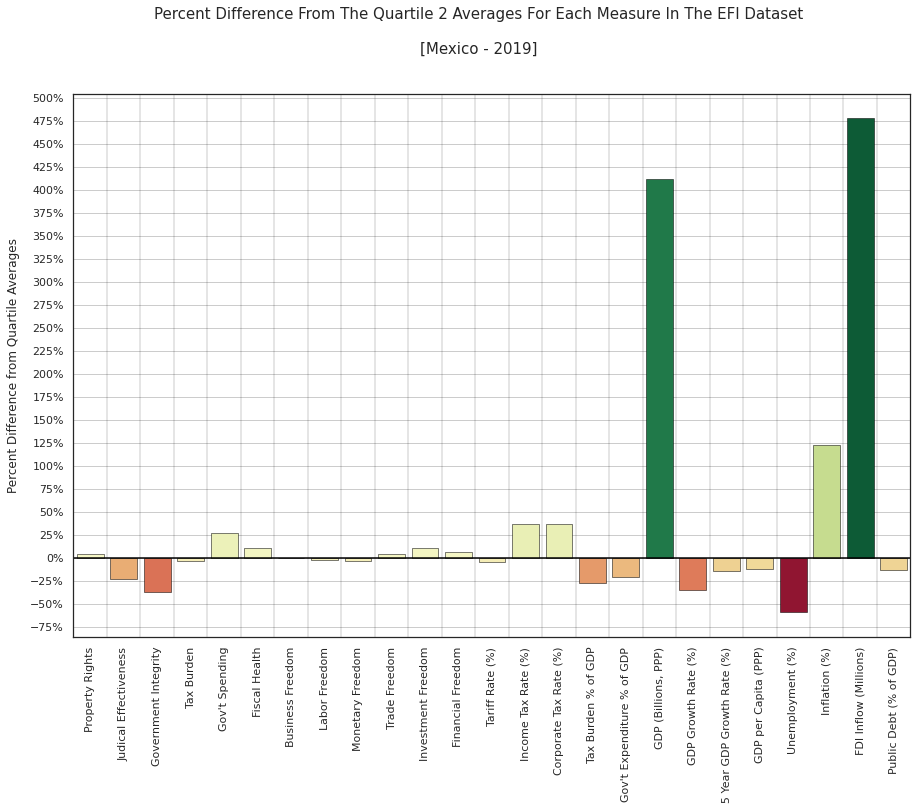

In [85]:
# Display the percent difference from the quartile average for Mexico in EFI 2019
plot_pct_diff_quartile(efi_2019, 'Mexico')

Here we can see that Mexico, like the year previous, still has a much higher than average FDI (Millions) and GDP (Billions, PPP) than other countries in the same quartile. What's interesting here is that compared to last year, Mexico's inflation rate has more than doubled (2.8% to 6.0%) making it over 120% higher than the quartile average.

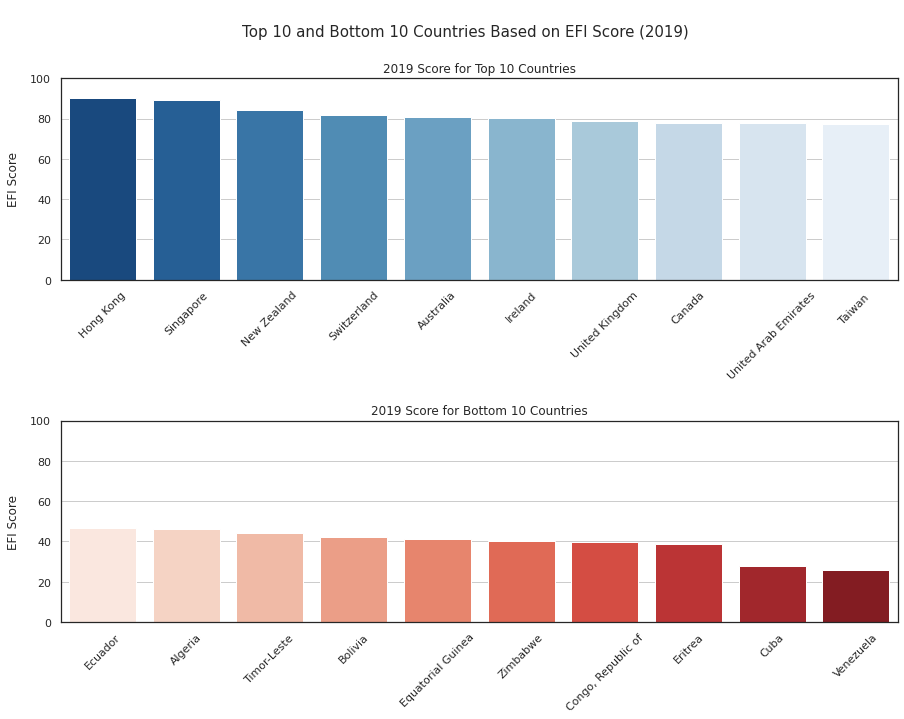

In [86]:
# Plot graph to see visual representation of scores for top 10 and bottom 10 countries for 2019 (EFI)
top_and_bottom_ten(efi_2019)

Here we can see the top 10 and bottom 10 countries from the EFI 2019 dataset. Like 2018, Hong Kong and Singapore score highly whereas Cuba and Venezuela seem to remain at the bottom.

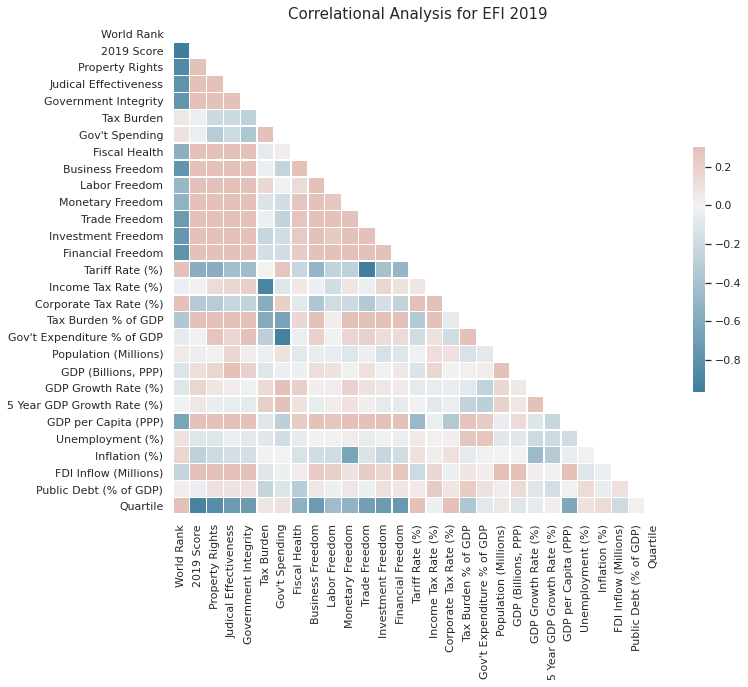

In [87]:
# Correlation plot for 2019 (EFI)
show_correlation(efi_2019)

Here, we see the correlations between the different measures for EFI 2019. Like 2018, it seems that the measures for 2019 are similarly correlated.

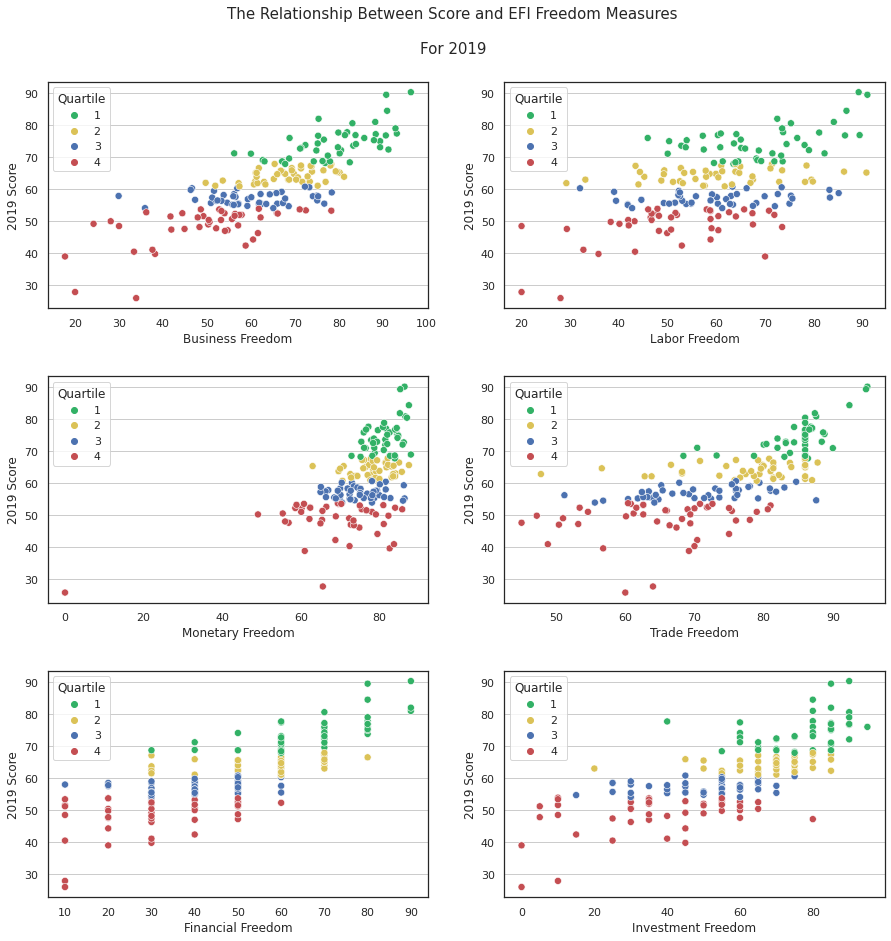

In [88]:
# Scatter plot to show the relationship between the EFI freedom measures and EFI score
scatter_quartile_averages_freedom_efi(efi_2019)

Like 2018, we can see that all of the freedom measures have strong positive correlations with EFI score.

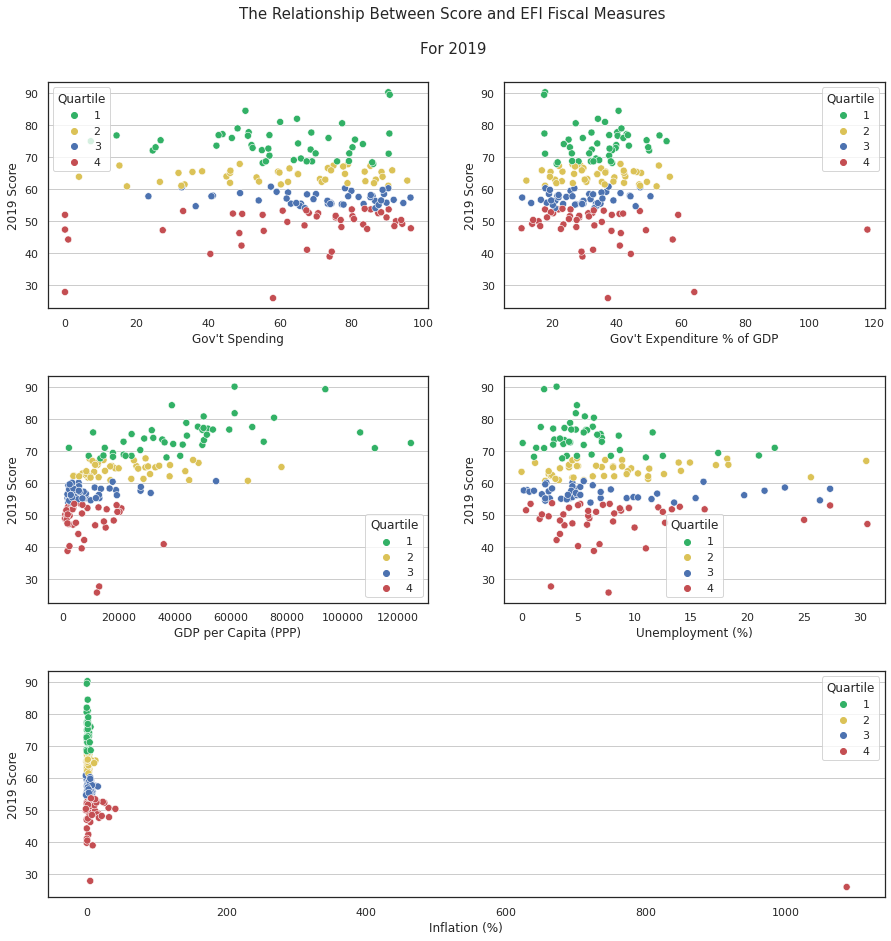

In [89]:
# Scatter plot to show the relationship between the EFI fiscal measures and EFI score
scatter_quartile_averages_fiscal_efi(efi_2019)

Similar to 2018, the correlations between the fiscal measures and the EFI score are much weaker. We can notice however that there is an outlier with a significantly higher inflation rate than all other countries.

In [90]:
# Create choropleth map of world 2019 (EFI)
show_world_choropleth(efi_2019)

Here we see geographically how countries rank in 2019. Compared to last year, we can see that some countries have dropped down in ranking (Colombia, Kazakhstan, Poland) while others have risen (Thailand, Bulgaria).

<a id="efi_2020_eda"></a>
### 7iii. Economic Freedom Index 2020
---

In [91]:
# Compare Germany against world averages for 2020 (EFI)
compare_with_world_averages(efi_2020, 'Germany')

   EFI Values for [Germany] Compared to Worldwide Averages in 2020.


   Measures                             Country            World Averages        % Difference
   ------------------------------------------------------------------------------------------
   Country Name                           Germany               -                     -
   Property Rights                        80.5                  57.52                 39.95
   Judical Effectiveness                  74.3                  46.0                  61.52
   Government Integrity                   82.8                  44.6                  85.65
   Tax Burden                             60.9                  77.78                 -21.7
   Gov't Spending                         42.2                  66.61                 -36.65
   Fiscal Health                          92.9                  69.52                 33.63
   Business Freedom                       82.8                  64.16                 29.05
   Labor 

Here we can see how Germany scores for each measure compared to the world averages for 2020.

In [92]:
# Compare Germany against quartile averages for 2020 (EFI)
compare_with_quartile_averages(efi_2020, 'Germany')

   EFI Values for [Germany] Compared to Quartile 1 Averages in 2020.


   Measures                              Country         Quartile 1 Averages      % Difference
   --------------------------------------------------------------------------------------------
   Country Name                           Germany               -                     -
   Property Rights                        80.5                  78.59                 2.43
   Judical Effectiveness                  74.3                  66.58                 11.6
   Government Integrity                   82.8                  69.7                  18.79
   Tax Burden                             60.9                  75.38                 -19.21
   Gov't Spending                         42.2                  62.24                 -32.2
   Fiscal Health                          92.9                  90.16                 3.04
   Business Freedom                       82.8                  78.97                 4.85
   Labor 

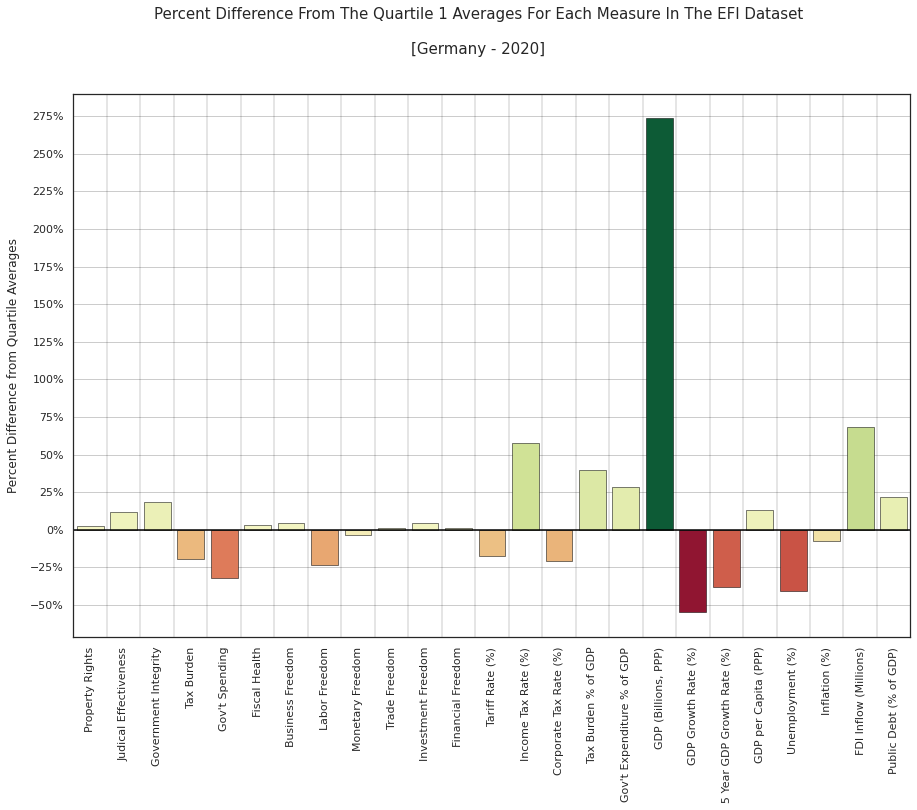

In [93]:
# Display the percent difference from the quartile average for Germany in EFI 2020
plot_pct_diff_quartile(efi_2020, 'Germany')

Here we can see that Germany maintains similar differences to quartile averages in the previous two years (2019, 2018). Germany's inflation rate now also appears to be much closer to the quartile average than the previous two years.

In [94]:
# Compare Mexico against world averages for 2020 (EFI)
compare_with_world_averages(efi_2020, 'Mexico')

   EFI Values for [Mexico] Compared to Worldwide Averages in 2020.


   Measures                             Country            World Averages        % Difference
   ------------------------------------------------------------------------------------------
   Country Name                           Mexico                -                     -
   Property Rights                        58.3                  57.52                 1.36
   Judical Effectiveness                  34.7                  46.0                  -24.57
   Government Integrity                   36.7                  44.6                  -17.71
   Tax Burden                             76.1                  77.78                 -2.16
   Gov't Spending                         79.3                  66.61                 19.05
   Fiscal Health                          87.5                  69.52                 25.86
   Business Freedom                       67.0                  64.16                 4.43
   Labor Fr

Here we can see how Mexico scores for each measure compared to the world averages for 2020.

In [95]:
# Compare Mexico against quartile averages for 2020 EFI
compare_with_quartile_averages(efi_2020, 'Mexico')

   EFI Values for [Mexico] Compared to Quartile 2 Averages in 2020.


   Measures                              Country         Quartile 2 Averages      % Difference
   --------------------------------------------------------------------------------------------
   Country Name                           Mexico                -                     -
   Property Rights                        58.3                  62.52                 -6.75
   Judical Effectiveness                  34.7                  47.03                 -26.22
   Government Integrity                   36.7                  47.56                 -22.83
   Tax Burden                             76.1                  79.67                 -4.48
   Gov't Spending                         79.3                  63.03                 25.81
   Fiscal Health                          87.5                  76.97                 13.68
   Business Freedom                       67.0                  67.58                 -0.86
   La

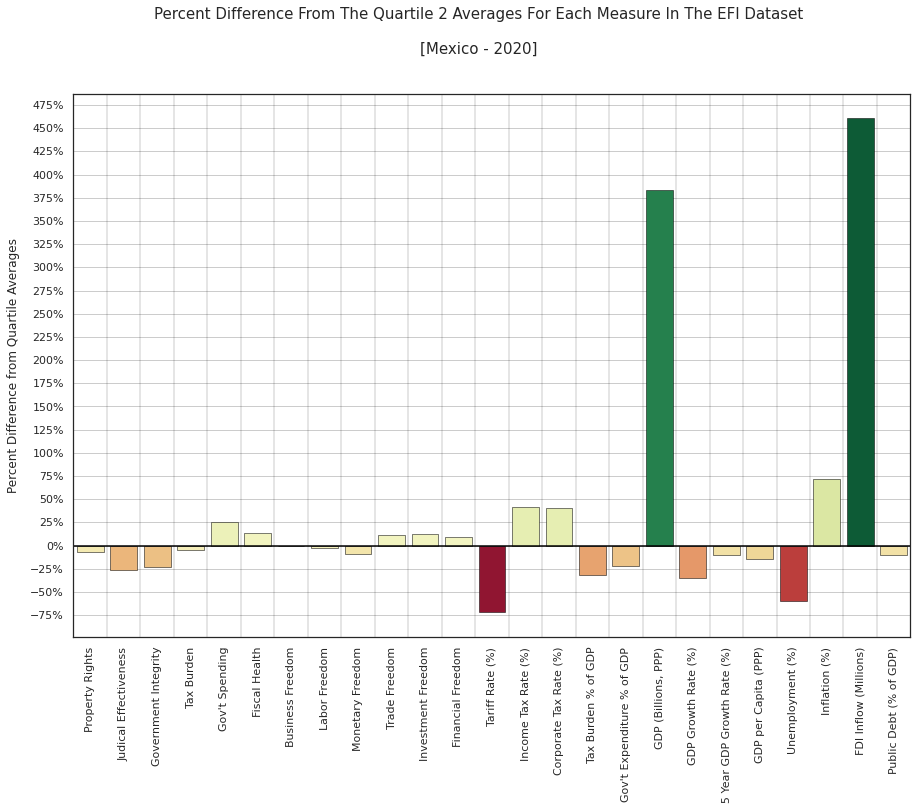

In [96]:
# Display the percent difference from the quartile average for Mexico in EFI 2020
plot_pct_diff_quartile(efi_2020, 'Mexico')

As with previous years, we can see that Mexico maintains a higher than average FDI (Millions) and GDP (Billions, PPP). While it seems that Mexico's inflation has dropped this year to 4.9% from last years 6.0%, it is still over 70% above the quartile average.

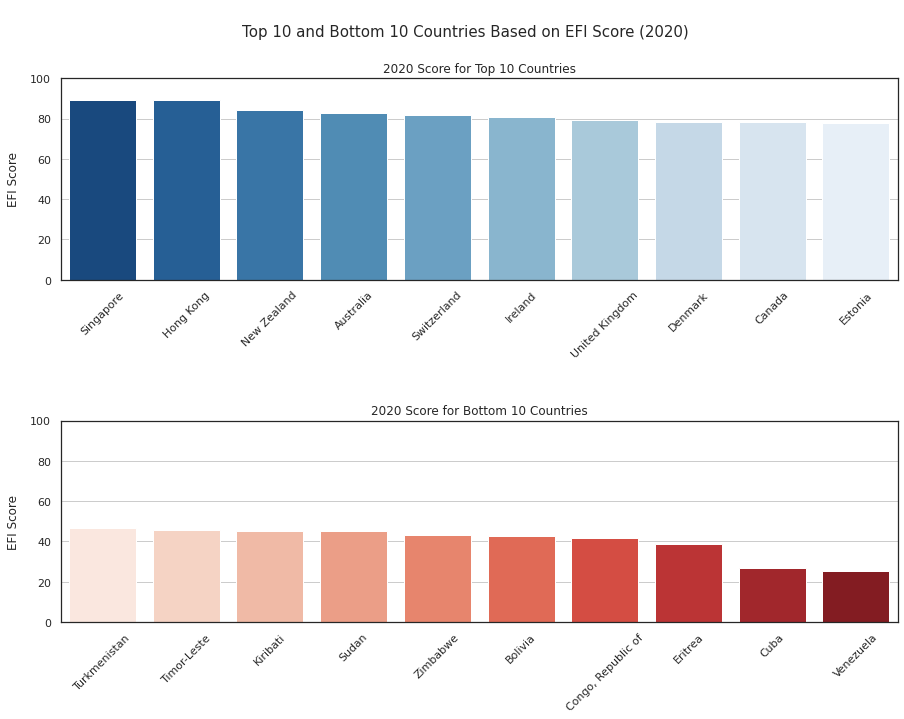

In [97]:
# Plot graph to see visual representation of scores for top 10 and bottom 10 countries for 2020 (EFI)
top_and_bottom_ten(efi_2020)

Here we can see that Singapore takes the top spot this year. This is the first year that Hong Kong has not come first since the dataset has been published. Apart from this, there doesn't seem to be much change from previous years.

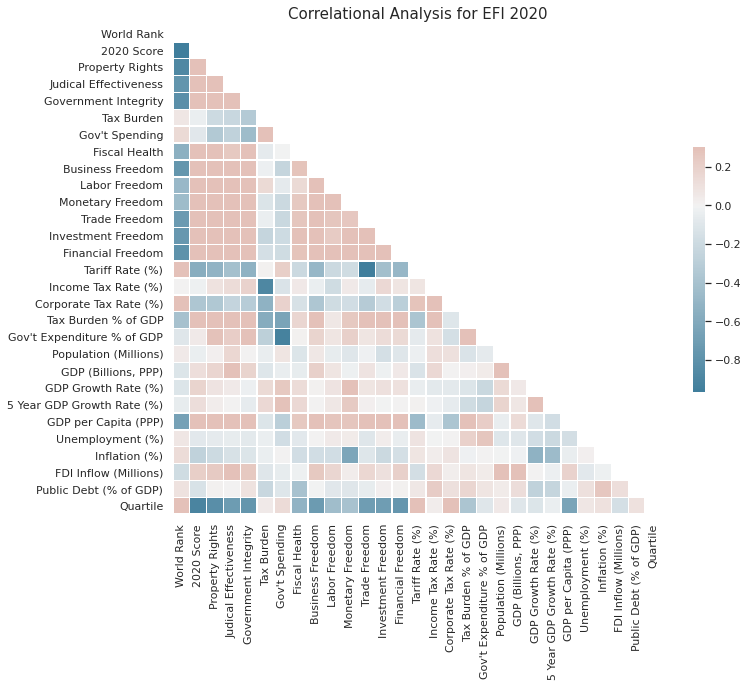

In [98]:
# Correlation plot for 2020 (EFI)
show_correlation(efi_2020)

Once again, the correlations look to remain consistent compared with previous years.

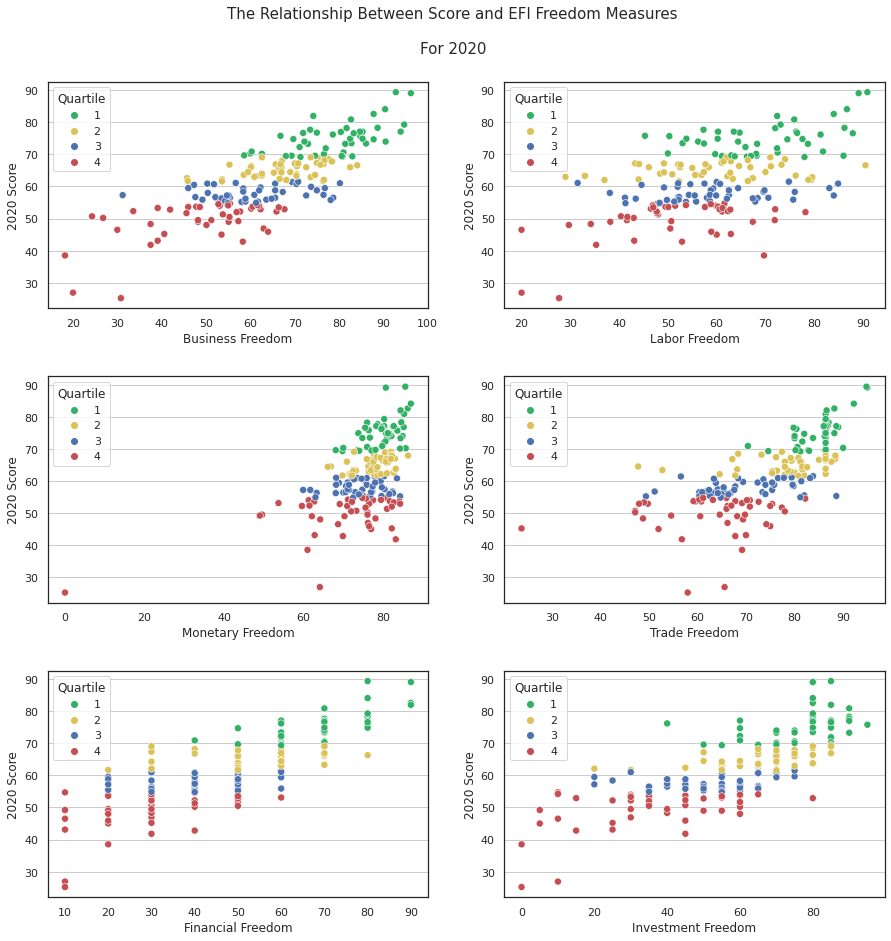

In [99]:
# Scatter plot to show the relationship between the EFI freedom measures and EFI score
scatter_quartile_averages_freedom_efi(efi_2020)

As with previous years, the freedom measures show strong positive correlations with EFI score.

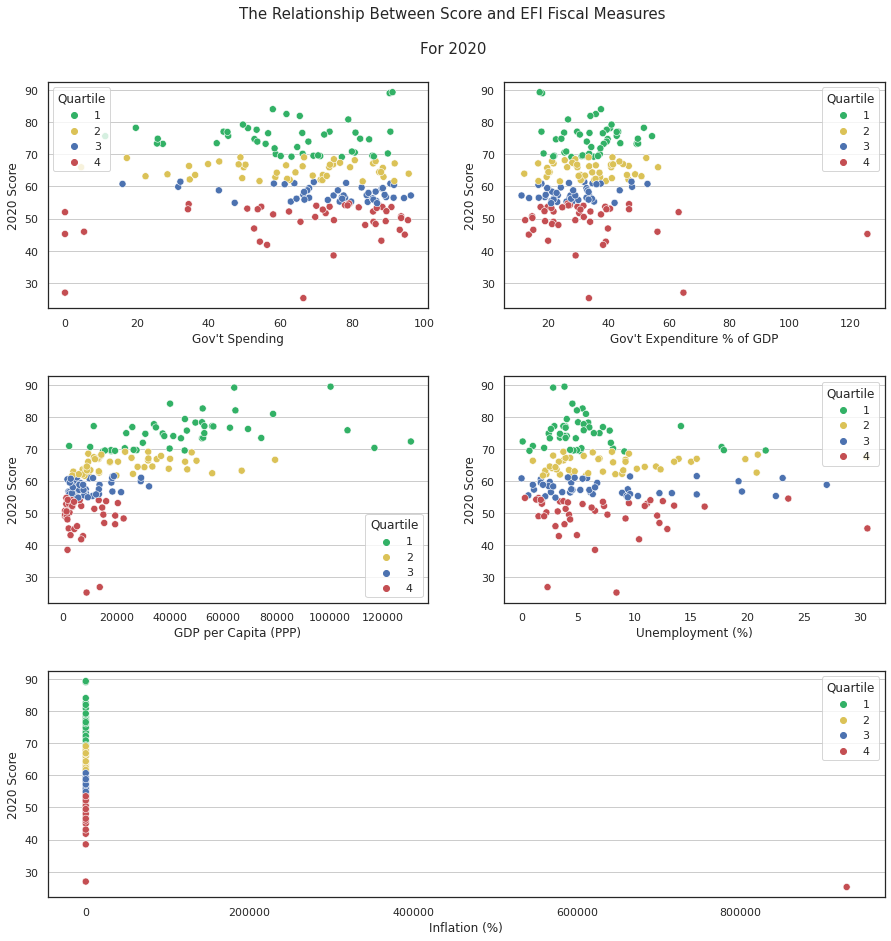

In [100]:
# Scatter plot to show the relationship between the EFI fiscal measures and EFI score
scatter_quartile_averages_fiscal_efi(efi_2020)

Here we can see again that unemployment rates are fairly consistent across quartiles, similar to the previous years. We can also see that the inflation rate for the outlier is now extremely large compared to the rest of the other countries.

In [101]:
# Create choropleth map of world 2020 (EFI)
show_world_choropleth(efi_2020)

Here we can see some minor changes with Kazakhstan and Colombia moving up into the first quartile again, while Peru and Uruguay slide down into the second quartile.

<a id="efw_2020_eda"></a>
### 7iv. Economic Freedom of the World 2020 (2018)
---

In [102]:
# Compare Germany against world averages for 2018 (EFW)
compare_with_world_averages(efw_2018, 'Germany')

   EFW Values for [Germany] Compared to Worldwide Averages in 2018.


   Measures                             Country            World Averages        % Difference
   ------------------------------------------------------------------------------------------
   Countries                              Germany               -                     -
   Size of Government                     6.13                  6.63                  -7.54
   Legal System & Property Rights         7.38                  5.25                  40.57
   Sound Money                            9.39                  8.28                  13.41
   Freedom to Trade Internationally       8.23                  7.04                  16.9
   Regulation                             8.13                  7.11                  14.35


Here we can see how Germany scores against world averages in the EFW dataset. It seems to score above average for all measures apart from size of government.

In [103]:
# Compare Germany against quartile averages for 2018 (EFW)
compare_with_quartile_averages(efw_2018, 'Germany')

   EFW Values for [Germany] Compared to Quartile 1 Averages in 2018.


   Measures                              Country         Quartile 1 Averages      % Difference
   --------------------------------------------------------------------------------------------
   Countries                              Germany               -                     -
   Size of Government                     6.13                  7.05                  -13.05
   Legal System & Property Rights         7.38                  6.81                  8.37
   Sound Money                            9.39                  9.48                  -0.95
   Freedom to Trade Internationally       8.23                  8.31                  -0.96
   Regulation                             8.13                  8.07                  0.74


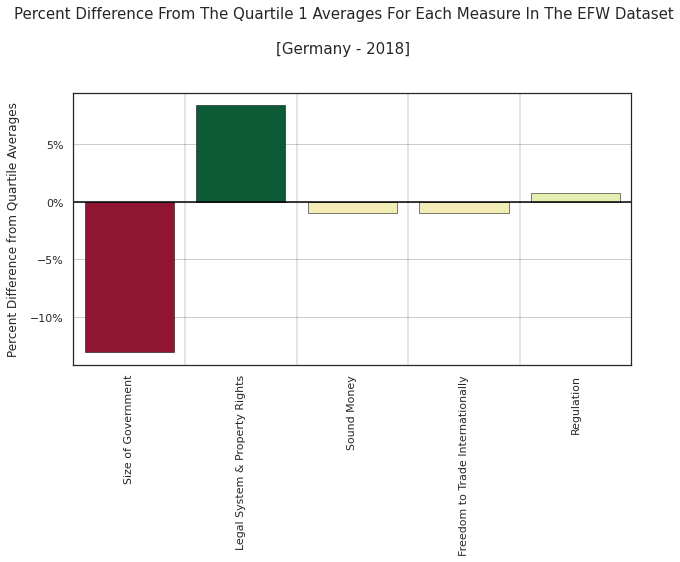

In [104]:
# Display the percent difference from the quartile average for Germany in EFW 2020
plot_pct_diff_quartile(efw_2018, 'Germany')

Here we can see that Germany scores pretty close to the quartile averages with a slighlty lower than average score for the size of government. As the EFW scores the size of government measure lower for countries who have a bigger sized government, this comparison against quartile averages indicates that Germany's size of government is larger on average than the other countries within the same quartile.

In [105]:
# Compare Mexico against world averages for 2018 (EFW)
compare_with_world_averages(efw_2018, 'Mexico')

   EFW Values for [Mexico] Compared to Worldwide Averages in 2018.


   Measures                             Country            World Averages        % Difference
   ------------------------------------------------------------------------------------------
   Countries                              Mexico                -                     -
   Size of Government                     8.38                  6.63                  26.4
   Legal System & Property Rights         4.73                  5.25                  -9.9
   Sound Money                            8.13                  8.28                  -1.81
   Freedom to Trade Internationally       7.66                  7.04                  8.81
   Regulation                             7.14                  7.11                  0.42


Here we can see how Mexico scores against world averages in the EFW dataset. It seems to score closer to the world averages for most measures apart from size of government where it scores over 25% above average.

In [106]:
# Compare Mexico against quartile averages for 2018 (EFW)
compare_with_quartile_averages(efw_2018, 'Mexico')

   EFW Values for [Mexico] Compared to Quartile 2 Averages in 2018.


   Measures                              Country         Quartile 2 Averages      % Difference
   --------------------------------------------------------------------------------------------
   Countries                              Mexico                -                     -
   Size of Government                     8.38                  6.88                  21.8
   Legal System & Property Rights         4.73                  5.42                  -12.73
   Sound Money                            8.13                  9.15                  -11.15
   Freedom to Trade Internationally       7.66                  7.71                  -0.65
   Regulation                             7.14                  7.37                  -3.12


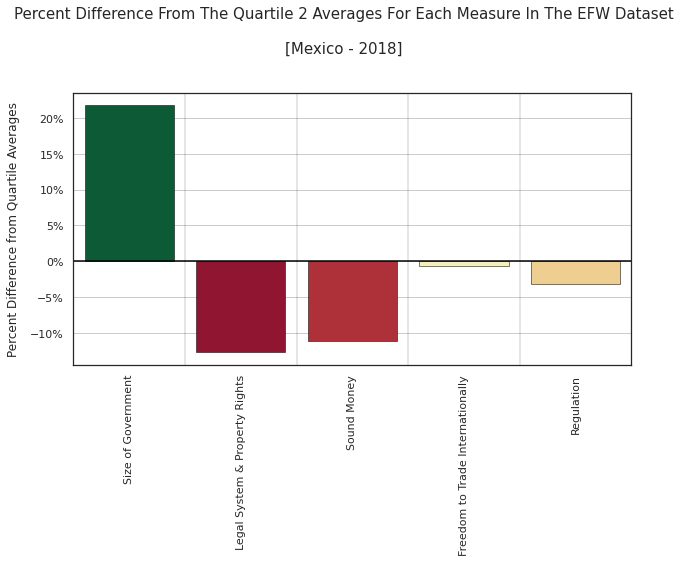

In [107]:
# Display the percent difference from the quartile average for Mexico in EFW 2020
plot_pct_diff_quartile(efw_2018, 'Mexico')

Here we can see that Mexico scores lower than the quartile average for legal system & property rights and sound money but scores over 20% higher for the size of government. This indicates that Mexico's government is particulalrly small compared to the rest of the countries in the same quartile.

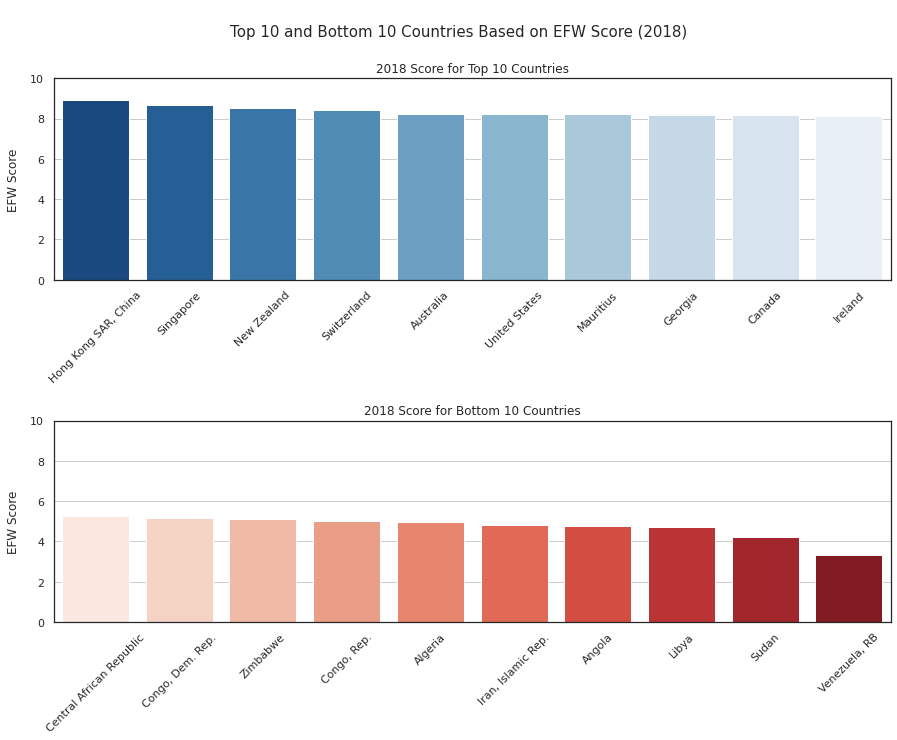

In [108]:
# Plot graph to see visual representation of scores for top 10 and bottom 10 countries for 2018 (EFW)
top_and_bottom_ten(efw_2018)

Here we can see the top 10 and bottom 10 countries ranked by the EFW datatset.

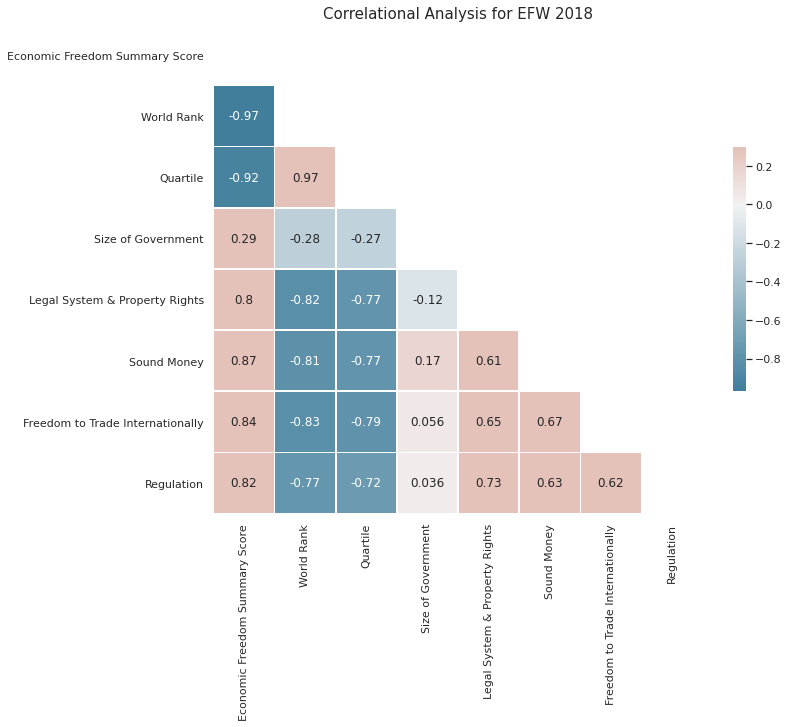

In [109]:
# Correlation plot for 2018 (EFW)
show_correlation(efw_2018)

Here we can see that the majority of correlations are relatively strong (>0.6) while correlations with the size of government are relatively weak (<0.3). What is consistent however, compared to the EFI datasets, is that the size of government seems to be positively correlated with score indicating that the bigger the government, the more likely it is that a country will receive a higher economic freedom score.

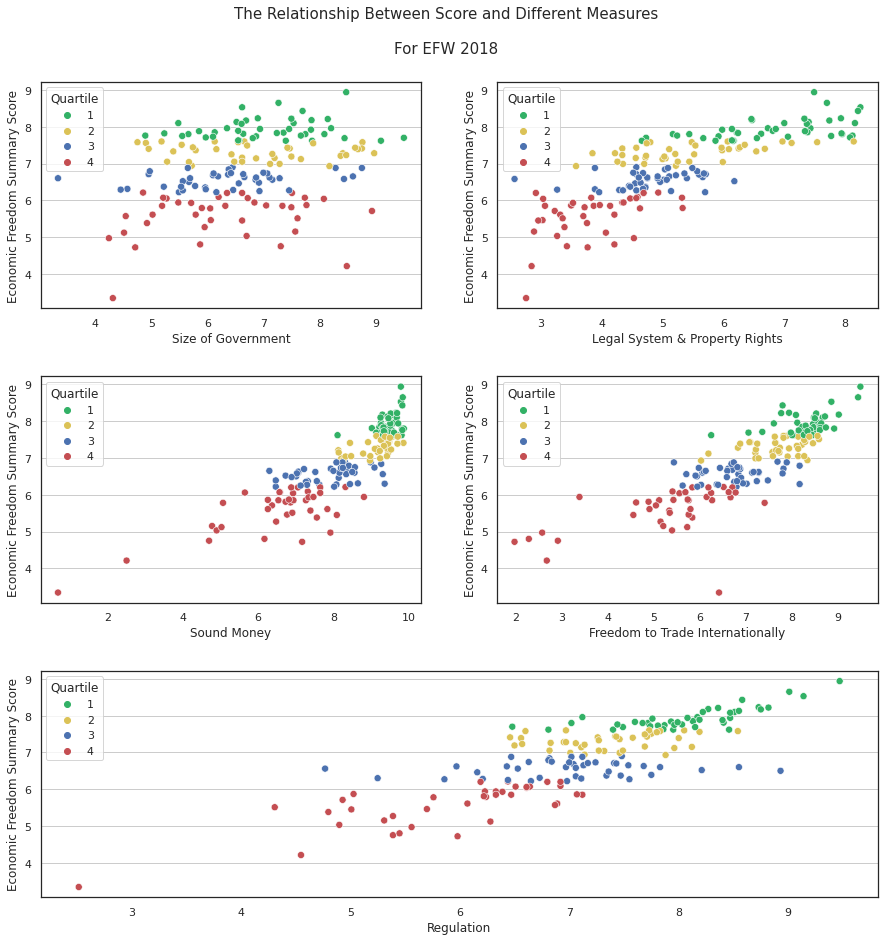

In [110]:
# Scatter plot to show the relationship between the EFW measures and EFW score
scatter_quartile_averages_efw(efw_2018)

Apart from size of government, all other measures seem to show a strong positive correlation with EFW score.

In [111]:
# Display Choropleth World Map for Economic Freedom of the World 2018
show_world_choropleth(efw_2018)

Here we can see that the Choropleth map for the EFW dataset is very similar to the EFI datasets with the majority of countries ranking similarly across all datasets.

**[Back to Top](#top)** <br>

<a id="data_comparison_analysis"></a>
## 8. Data Comparison Analysis
---

In this section, we will look more closely at some of the comparisons between the EFI and EFW datasets.

**8i. [EFI Comparison (2018, 2019, 2020)](#efi_2018_2019_2020)** <br>
**8ii. [EFI 2018 and EFW 2018](#efi_2018_efw_2018)** <br>

<a id="efi_2018_2019_2020"></a>
### 8i. Economic Freedom Index Comparison Analysis Between Years 2018, 2019 and 2020
---

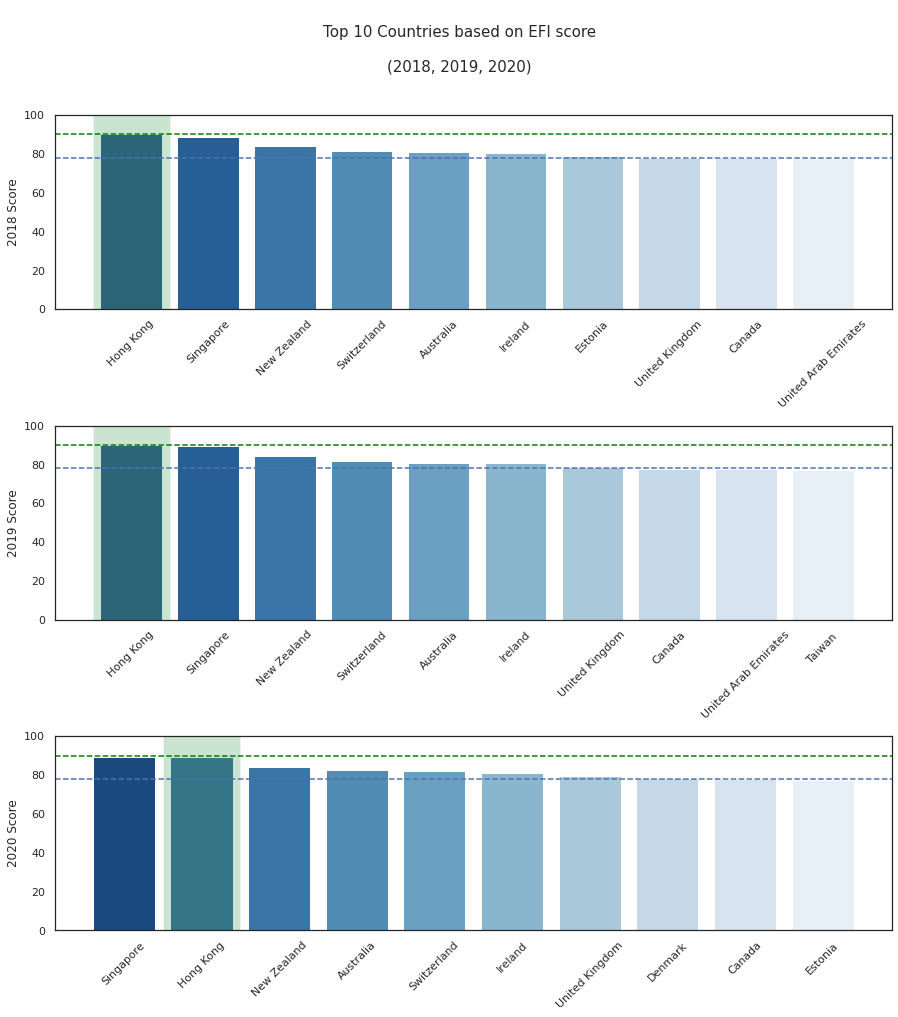

In [112]:
# Plot graphs to see visual representation of top ten countries for years 2018, 2019 and 2020

# Top ten countries based on score
efi_2018_top_ten = efi_2018.sort_values(['World Rank'])[['Country Name', 'World Rank', '2018 Score']].head(10)
efi_2019_top_ten = efi_2019.sort_values(['World Rank'])[['Country Name', 'World Rank', '2019 Score']].head(10)
efi_2020_top_ten = efi_2020.sort_values(['World Rank'])[['Country Name', 'World Rank', '2020 Score']].head(10)

# Plot setup
fig, axs = plt.subplots(3, 1, figsize=(15,15))
fig.subplots_adjust(hspace=0.6)

# Title
fig.suptitle('\nTop 10 Countries based on EFI score\n\n(2018, 2019, 2020)', fontsize=15)

# Adjust axs
plt.setp(axs[0].get_xticklabels(), rotation=45)
plt.setp(axs[1].get_xticklabels(), rotation=45)
plt.setp(axs[2].get_xticklabels(), rotation=45)

axs[0].set_ylim([0, 100])
axs[1].set_ylim([0, 100])
axs[2].set_ylim([0, 100])

# axs[0].grid(axis='y')
# axs[1].grid(axis='y')
# axs[2].grid(axis='y')

# Lines
axs[0].axhline(78, ls='--')
axs[0].axhline(90, ls='--', color='green')

axs[1].axhline(78, ls='--')
axs[1].axhline(90, ls='--', color='green')

axs[2].axhline(78, ls='--')
axs[2].axhline(90, ls='--', color='green')

# Plots
sns.barplot(x='Country Name', y='2018 Score', data=efi_2018_top_ten, palette="Blues_r", ax=axs[0])
sns.barplot(x='Country Name', y='2019 Score', data=efi_2019_top_ten, palette="Blues_r", ax=axs[1])
sns.barplot(x='Country Name', y='2020 Score', data=efi_2020_top_ten, palette="Blues_r", ax=axs[2])

# Adjust labels
axs[0].set_xlabel('')
axs[1].set_xlabel('')
axs[2].set_xlabel('')

# Highlighting
axs[0].axvspan(-0.5, 0.5, facecolor='g', alpha=0.3)
axs[1].axvspan(-0.5, 0.5, facecolor='g', alpha=0.3)
axs[2].axvspan(0.5, 1.5, facecolor='g', alpha=0.3)

plt.show()

Like we saw earlier, we can see that for the first year since data has been collected for the EFI, Hong Kong has dropped down to second. We can also see that these countries for this dataset consistently rank in the top 10 across multiple years.

Additionally, we can see that Singapore and Hong Kong score highly even amongst the top 10, around the 90 mark, whereas other countries in the top ten tend to hover 10 points lower around the 80 mark.

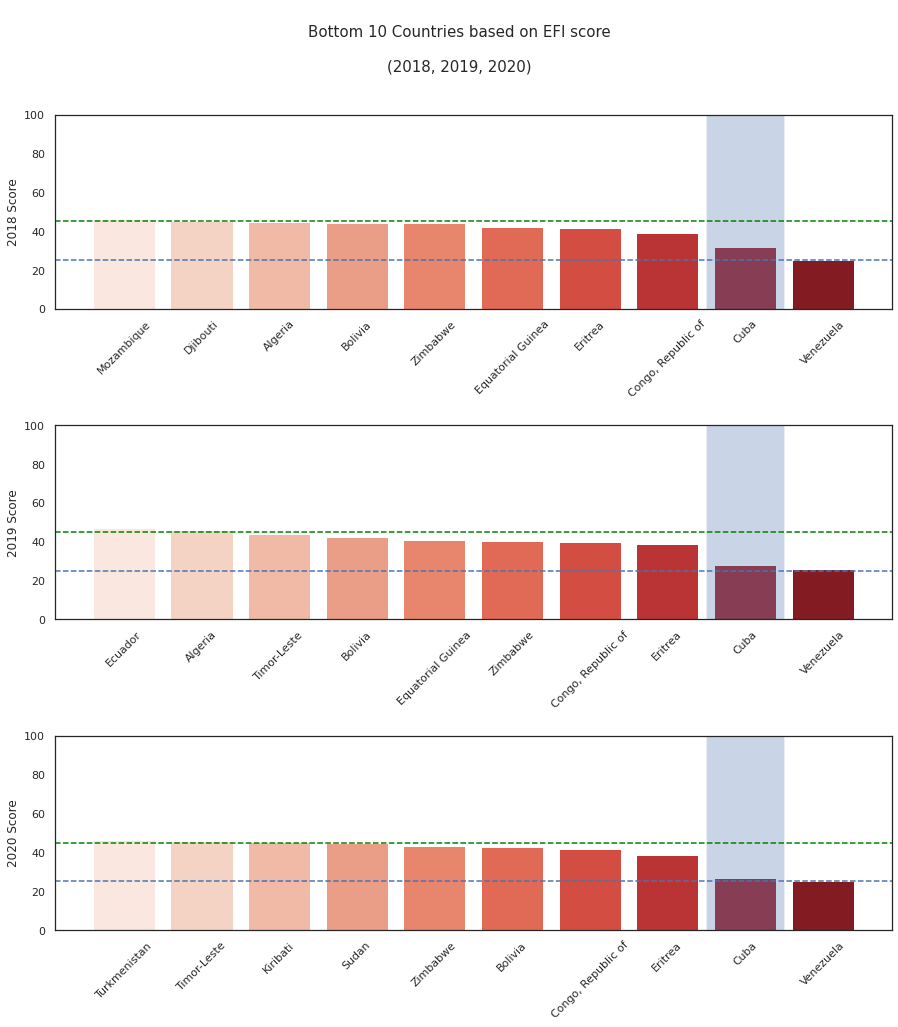

In [113]:
# Plot graphs to see visual representation of bottom ten countries for years 2018, 2019 and 2020

# Bottom ten countries based on score
efi_2018_bottom_ten = efi_2018.sort_values(['World Rank'])[['Country Name', 'World Rank', '2018 Score']].tail(10)
efi_2019_bottom_ten = efi_2019.sort_values(['World Rank'])[['Country Name', 'World Rank', '2019 Score']].tail(10)
efi_2020_bottom_ten = efi_2020.sort_values(['World Rank'])[['Country Name', 'World Rank', '2020 Score']].tail(10)

# Plot setup
fig, axs = plt.subplots(3, 1, figsize=(15,15))
fig.subplots_adjust(hspace=0.6)

# Title
fig.suptitle('\nBottom 10 Countries based on EFI score\n\n(2018, 2019, 2020)', fontsize=15)

# Adjust axs
plt.setp(axs[0].get_xticklabels(), rotation=45)
plt.setp(axs[1].get_xticklabels(), rotation=45)
plt.setp(axs[2].get_xticklabels(), rotation=45)

axs[0].set_ylim([0, 100])
axs[1].set_ylim([0, 100])
axs[2].set_ylim([0, 100])

# axs[0].grid(axis='y')
# axs[1].grid(axis='y')
# axs[2].grid(axis='y')

# Lines
axs[0].axhline(25, ls='--')
axs[0].axhline(45, ls='--', color='green')

axs[1].axhline(25, ls='--')
axs[1].axhline(45, ls='--', color='green')

axs[2].axhline(25, ls='--')
axs[2].axhline(45, ls='--', color='green')

# Plots
sns.barplot(x='Country Name', y='2018 Score', data=efi_2018_bottom_ten, palette="Reds", ax=axs[0])
sns.barplot(x='Country Name', y='2019 Score', data=efi_2019_bottom_ten, palette="Reds", ax=axs[1])
sns.barplot(x='Country Name', y='2020 Score', data=efi_2020_bottom_ten, palette="Reds", ax=axs[2])

# Adjust labels
axs[0].set_xlabel('')
axs[1].set_xlabel('')
axs[2].set_xlabel('')

#Highlighting
axs[0].axvspan(7.5, 8.5, facecolor='b', alpha=0.3)
axs[1].axvspan(7.5, 8.5, facecolor='b', alpha=0.3)
axs[2].axvspan(7.5, 8.5, facecolor='b', alpha=0.3)

plt.show()

In contrast to the top 10, the range between the bottom 10 countries is double, around 20 marks between the bottom and 10th from bottom. One observation we can make is that countries in the lower 10 usually hover around the same score year on year, however, it seems every year Cuba's score lowers to the point where it is now almost equal with Venezuela.

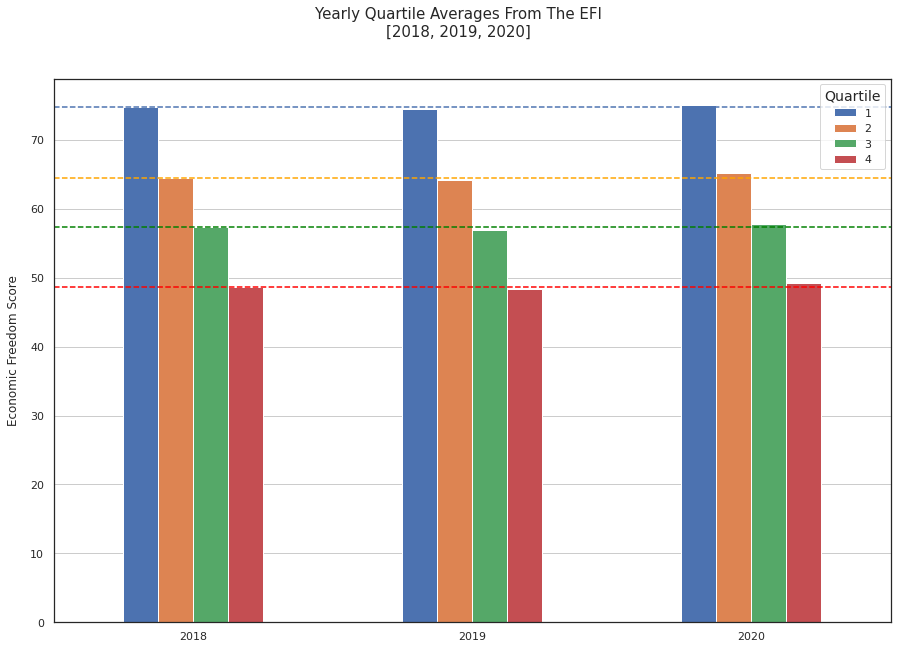

In [114]:
# Show cat plot of average progress by year 2018, 2019, 2020 EFI

# Prep dataframes for merge
df1 = efi_2018.groupby('Quartile').mean()[['2018 Score']]
df2 = efi_2019.groupby('Quartile').mean()['2019 Score']
df3 = efi_2020.groupby('Quartile').mean()['2020 Score']

# Merge dataframes
merged_df = df1.merge(df2,on='Quartile').merge(df3,on='Quartile')
merged_df.rename(columns={'2018 Score': '2018', '2019 Score': '2019', '2020 Score': '2020'}, inplace=True)
merged_df = merged_df.T

# Plot setup
fig, ax = plt.subplots(figsize=(15,10))

# Title
fig.suptitle('Yearly Quartile Averages From The EFI\n[2018, 2019, 2020]', fontsize=15)

# Extract quartile values
q1_2018 = merged_df.loc[merged_df.index == '2018'].values.tolist()[0][0]
q2_2018 = merged_df.loc[merged_df.index == '2018'].values.tolist()[0][1]
q3_2018 = merged_df.loc[merged_df.index == '2018'].values.tolist()[0][2]
q4_2018 = merged_df.loc[merged_df.index == '2018'].values.tolist()[0][3]

# Lines
ax.axhline(q1_2018, ls='--')
ax.axhline(q2_2018, ls='--', color='orange')
ax.axhline(q3_2018, ls='--', color='green')
ax.axhline(q4_2018, ls='--', color='red')

# Adjust labels
ax.set_ylabel('Economic Freedom Score', labelpad=10)

# Plot
merged_df.plot(kind='bar', rot=0, ax=ax)

# Grid & Legend adjustments
ax.grid(axis='y')
ax.legend(loc="upper right", title='Quartile', title_fontsize='14')

plt.show()

Here we can see that all quartile averages dipped slightly in 2019 but then bounced back in 2020 to finish slightly above the averages in 2018.

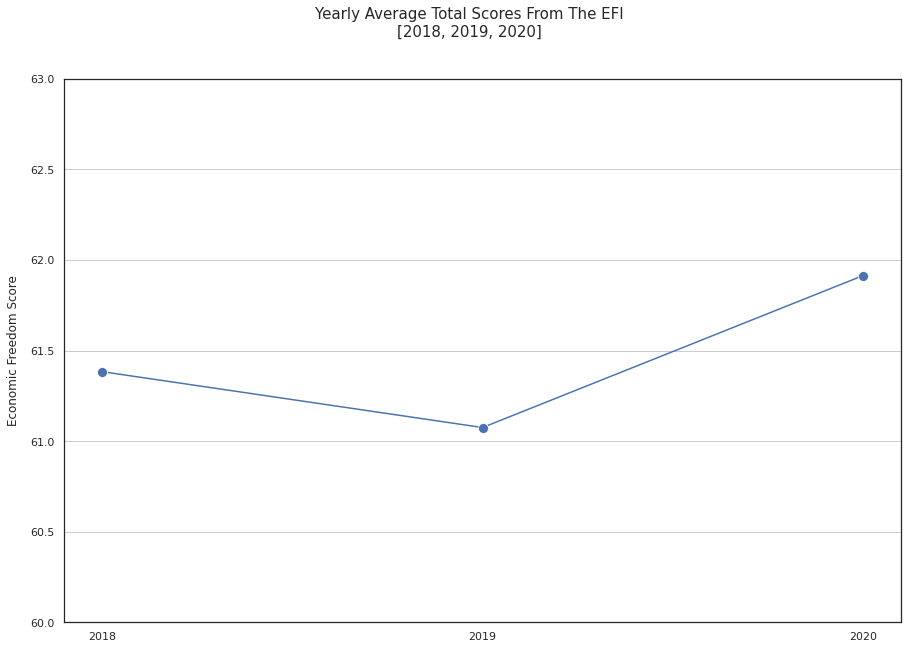

In [115]:
# Show line plot of average progress by year 2018, 2019, 2020 EFI

# Extract total score averages
efi_2018_average_score = efi_2018['2018 Score'].mean()
efi_2019_average_score = efi_2019['2019 Score'].mean()
efi_2020_average_score = efi_2020['2020 Score'].mean()

# Setup plot variables
years = ['2018', '2019', '2020']
yearly_averages = [efi_2018_average_score, efi_2019_average_score, efi_2020_average_score]

# Plot setup
fig, ax = plt.subplots(figsize=(15,10))

# Title
fig.suptitle('Yearly Average Total Scores From The EFI\n[2018, 2019, 2020]', fontsize=15)

# Adjust axs
ax.set_ylabel('Economic Freedom Score', labelpad=10)
ax.set_ylim([60, 63])
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

# Plot
sns.lineplot(x=years, y=yearly_averages, marker='o', markersize=10)

# Add grid to y axis
ax.grid(axis='y')

plt.show()

Here we can see the slight drop in averages before bouncing back in 2020 to finish above the 2018 average. 

In [116]:
# Show EFI quartile changes over each year for a given measure
def efi_quartile_changes_by_year(efi_2018, efi_2019,efi_2020, measure):
    
    """Display the quartile changes over each year of the EFI datasets for a given measure"""
    
    
    # Prep data
    efi_2018_quartiles = efi_2018.groupby('Quartile').mean()[[measure]]
    efi_2018_quartiles.rename(columns={measure: f'{measure} 2018'}, inplace=True)

    efi_2019_quartiles = efi_2019.groupby('Quartile').mean()[[measure]]
    efi_2019_quartiles.rename(columns={measure: f'{measure} 2019'}, inplace=True)

    efi_2020_quartiles = efi_2020.groupby('Quartile').mean()[[measure]]
    efi_2020_quartiles.rename(columns={measure: f'{measure} 2020'}, inplace=True)
    
    efi_quartiles_all = pd.concat([efi_2018_quartiles,
                                      efi_2019_quartiles,
                                      efi_2020_quartiles], 
                                      axis=1, join='outer', ignore_index=False)
    
    # Setup plot
    fig, ax = plt.subplots(figsize=(15,10))
    
    # Title
    fig.suptitle(f'Score Changes By Quartile And Year For {measure} In The EFI', fontsize=15)

    # Format axis labels
    ax.set_ylabel('Economic Freedom Index Score', labelpad=10)

    # Plot
    efi_quartiles_all.plot(kind='bar', rot=0, colormap='Accent', ax=ax)
    
    # Plot gridlines
    ax.grid(axis='y')
    ax.set_axisbelow(True)
    
    plt.show()

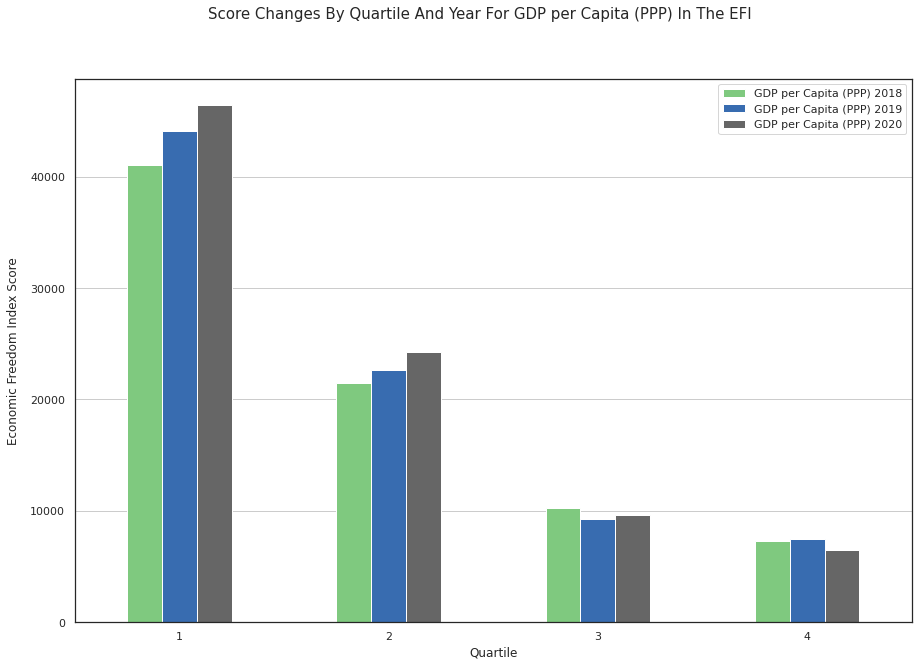

In [117]:
# Changes to quartile averages across years 2018, 2019 and 2020 for 'GDP per Capita (PPP)'
efi_quartile_changes_by_year(efi_2018, efi_2019, efi_2020, 'GDP per Capita (PPP)')

Here we can see that for countries in the first and second quartiles, the 'GDP per Capita (PPP)' is growing every year whereas for those countries in the third and fourth quartiles, the growth is much more stunted and either tends to remain the same or even decrease.

In [118]:
# Extract region data for each region

region_data_2018 = ['Country Name', 'Region', 'Region Rank', '2018 Score']
region_data_2019 = ['Country Name', 'Region', 'Region Rank', '2019 Score']
region_data_2020 = ['Country Name', 'Region', 'Region Rank', '2020 Score']

# EFI 2018
efi_2018_AP = efi_2018.loc[efi_2018['Region'] == 'Asia-Pacific'][region_data_2018].sort_values('Region Rank').head(3)
efi_2018_EU = efi_2018.loc[efi_2018['Region'] == 'Europe'][region_data_2018].sort_values('Region Rank').head(3)
efi_2018_AM = efi_2018.loc[efi_2018['Region'] == 'Americas'][region_data_2018].sort_values('Region Rank').head(3)
efi_2018_SSA = efi_2018.loc[efi_2018['Region'] == 'Sub-Saharan Africa'][region_data_2018].sort_values('Region Rank').head(3)
efi_2018_MENA = efi_2018.loc[efi_2018['Region'] == 'Middle East / North Africa'][region_data_2018].sort_values('Region Rank').head(3)

# EFI 2019
efi_2019_AP = efi_2019.loc[efi_2019['Region'] == 'Asia-Pacific'][region_data_2019].sort_values('Region Rank').head(3)
efi_2019_EU = efi_2019.loc[efi_2019['Region'] == 'Europe'][region_data_2019].sort_values('Region Rank').head(3)
efi_2019_AM = efi_2019.loc[efi_2019['Region'] == 'Americas'][region_data_2019].sort_values('Region Rank').head(3)
efi_2019_SSA = efi_2019.loc[efi_2019['Region'] == 'Sub-Saharan Africa'][region_data_2019].sort_values('Region Rank').head(3)
efi_2019_MENA = efi_2019.loc[efi_2019['Region'] == 'Middle East and North Africa'][region_data_2019].sort_values('Region Rank').head(3)

# EFI 2020
efi_2020_AP = efi_2020.loc[efi_2020['Region'] == 'Asia-Pacific'][region_data_2020].sort_values('Region Rank').head(3)
efi_2020_EU = efi_2020.loc[efi_2020['Region'] == 'Europe'][region_data_2020].sort_values('Region Rank').head(3)
efi_2020_AM = efi_2020.loc[efi_2020['Region'] == 'Americas'][region_data_2020].sort_values('Region Rank').head(3)
efi_2020_SSA = efi_2020.loc[efi_2020['Region'] == 'Sub-Saharan Africa'][region_data_2020].sort_values('Region Rank').head(3)
efi_2020_MENA = efi_2020.loc[efi_2020['Region'] == 'Middle East and North Africa'][region_data_2020].sort_values('Region Rank').head(3)

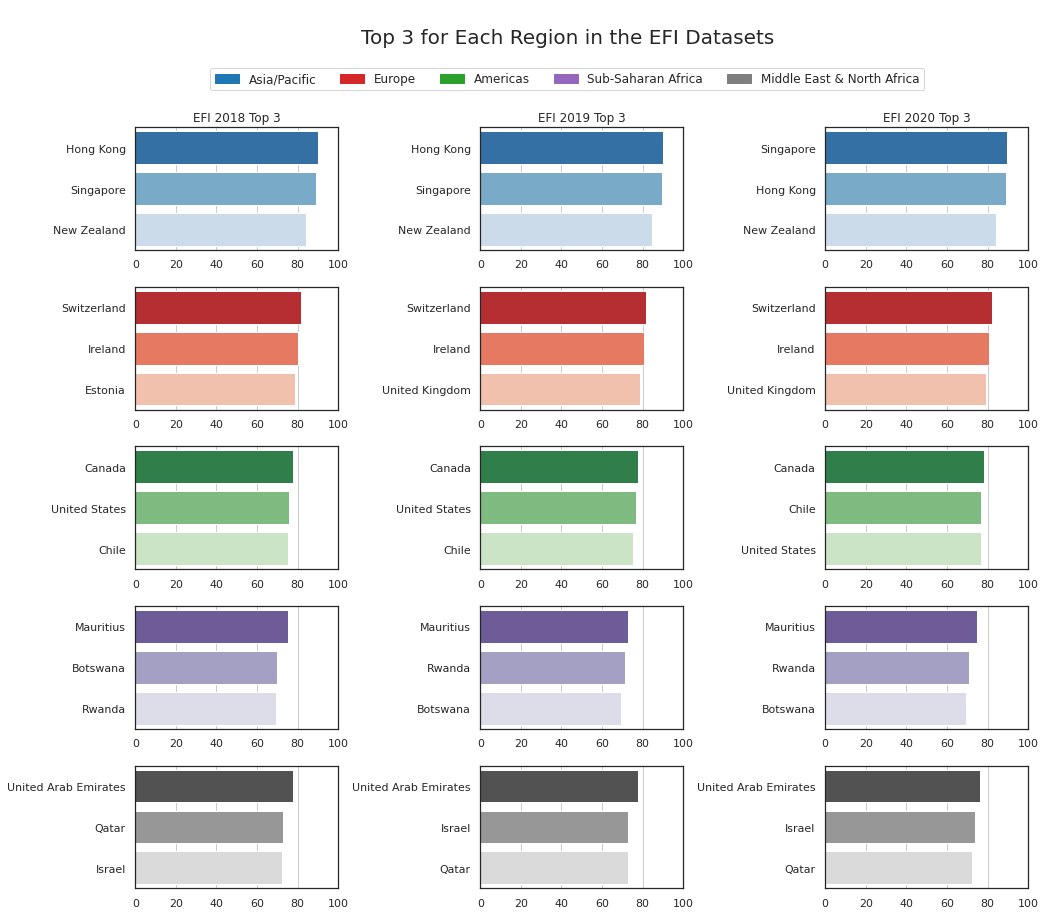

In [119]:
# Top three per region for EFI in 2018, 2019 and 2020

# Plot Setup
fig, axs = plt.subplots(5, 3, figsize=(16, 14))

# Title
fig.suptitle('\nTop 3 for Each Region in the EFI Datasets', fontsize=20, y=1)
fig.subplots_adjust(hspace=0.3)
fig.subplots_adjust(wspace=0.7)

# Ax titles
axs[0][0].set(title='EFI 2018 Top 3')
axs[0][1].set(title='EFI 2019 Top 3')
axs[0][2].set(title='EFI 2020 Top 3')

# Adjust axs 
for idx1 in range(0, 5):
    for idx2 in range(0, 3): 
        axs[idx1][idx2].grid(axis='x')
        axs[idx1][idx2].set_axisbelow(True)
        axs[idx1][idx2].set_xlim([0, 100])

# Plots
sns.barplot(x='2018 Score', y='Country Name', data=efi_2018_AP, palette="Blues_r", ax=axs[0][0])
sns.barplot(x='2019 Score', y='Country Name', data=efi_2019_AP, palette="Blues_r", ax=axs[0][1])
sns.barplot(x='2020 Score', y='Country Name', data=efi_2020_AP, palette="Blues_r", ax=axs[0][2])

sns.barplot(x='2018 Score', y='Country Name', data=efi_2018_EU, palette="Reds_r", ax=axs[1][0])
sns.barplot(x='2019 Score', y='Country Name', data=efi_2019_EU, palette="Reds_r", ax=axs[1][1])
sns.barplot(x='2020 Score', y='Country Name', data=efi_2020_EU, palette="Reds_r", ax=axs[1][2])

sns.barplot(x='2018 Score', y='Country Name', data=efi_2018_AM, palette="Greens_r", ax=axs[2][0])
sns.barplot(x='2019 Score', y='Country Name', data=efi_2019_AM, palette="Greens_r", ax=axs[2][1])
sns.barplot(x='2020 Score', y='Country Name', data=efi_2020_AM, palette="Greens_r", ax=axs[2][2])

sns.barplot(x='2018 Score', y='Country Name', data=efi_2018_SSA, palette="Purples_r", ax=axs[3][0])
sns.barplot(x='2019 Score', y='Country Name', data=efi_2019_SSA, palette="Purples_r", ax=axs[3][1])
sns.barplot(x='2020 Score', y='Country Name', data=efi_2020_SSA, palette="Purples_r", ax=axs[3][2])

sns.barplot(x='2018 Score', y='Country Name', data=efi_2018_MENA, palette="Greys_r", ax=axs[4][0])
sns.barplot(x='2019 Score', y='Country Name', data=efi_2019_MENA, palette="Greys_r", ax=axs[4][1])
sns.barplot(x='2020 Score', y='Country Name', data=efi_2020_MENA, palette="Greys_r", ax=axs[4][2])


# Adjust labels 
for idx1 in range(0, 5):
    for idx2 in range(0, 3): 
        axs[idx1][idx2].set_xlabel('')

for idx1 in range(0, 5):
    for idx2 in range(0, 3):
        axs[idx1][idx2].set_ylabel('')
        axs[idx1][idx2].set_ylabel('')

# Legend
blue_patch = mpatches.Patch(color='tab:blue', label='Asia/Pacific')
red_patch = mpatches.Patch(color='tab:red', label='Europe')
green_patch = mpatches.Patch(color='tab:green', label='Americas')
purple_patch = mpatches.Patch(color='tab:purple', label='Sub-Saharan Africa')
grey_patch = mpatches.Patch(color='tab:grey', label='Middle East & North Africa')
fig.legend(handles=[blue_patch, red_patch, green_patch, purple_patch, grey_patch], 
           loc='upper center', 
           ncol=5, 
           bbox_to_anchor=(0.5,0.945),
           fontsize=12)

plt.show()

Here we can see that the top 3 countries in each region tend to maintain their position over the years.

<a id="efi_2018_efw_2018"></a>
### 8ii. Economic Freedom Comparison Between EFI 2018 and EFW 2018
---

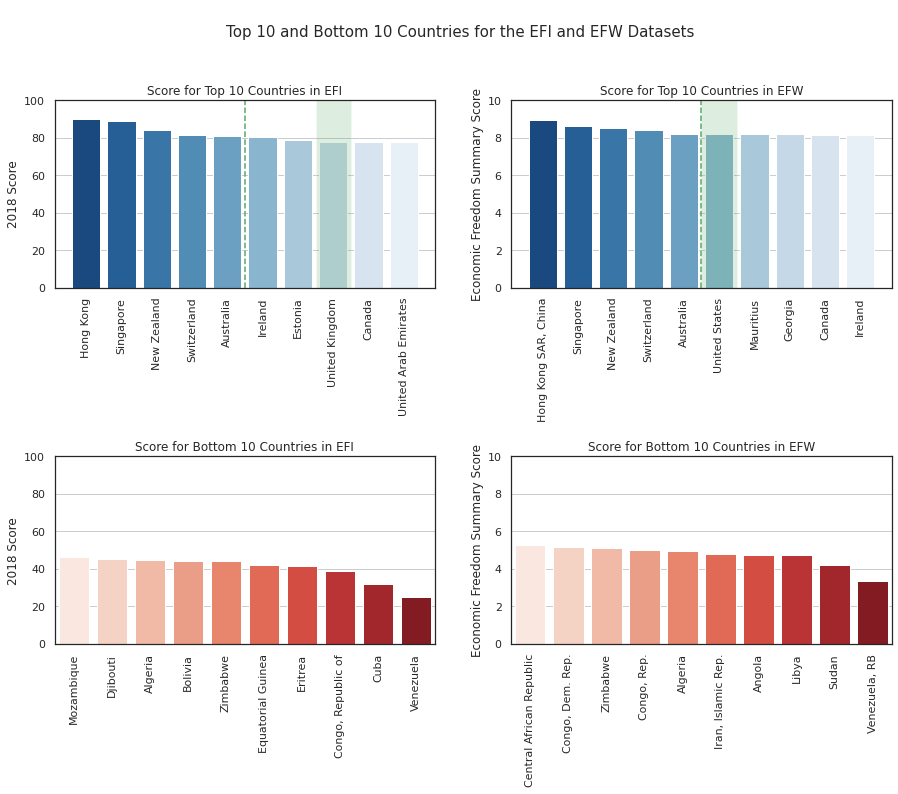

In [120]:
# Top ten and bottom ten of EFI and EFW

# Create dataframes for EFW top ten and bottom ten
efw_2018_top_ten = efw_2018.sort_values(['World Rank'])[
    ['Countries', 'World Rank', 'Economic Freedom Summary Score']].head(10)
efw_2018_bottom_ten = efw_2018.sort_values(['World Rank'])[
    ['Countries', 'World Rank', 'Economic Freedom Summary Score']].tail(10)

# Plot Setup
fig, axs = plt.subplots(2, 2, figsize=(15,10))

# Title
fig.suptitle('\nTop 10 and Bottom 10 Countries for the EFI and EFW Datasets', fontsize=15, y=1.01)
fig.subplots_adjust(hspace=0.9)

# Ax title
axs[0][0].set(title='Score for Top 10 Countries in EFI')
axs[0][1].set(title='Score for Top 10 Countries in EFW')
axs[1][0].set(title='Score for Bottom 10 Countries in EFI')
axs[1][1].set(title='Score for Bottom 10 Countries in EFW')

# Adjust axs 
for idx1 in range(0, 2):
    for idx2 in range(0, 2): 
        plt.setp(axs[idx1][idx2].get_xticklabels(), rotation=90)
        axs[idx1][idx2].grid(axis='y')
        axs[idx1][idx2].set_axisbelow(True)

# Set Y limits for each subplot 
axs[0][0].set_ylim([0, 100])
axs[0][1].set_ylim([0, 10])
axs[1][0].set_ylim([0, 100])
axs[1][1].set_ylim([0, 10])

# Lines
axs[0][0].axvline(4.5, ls='--', color='g')
axs[0][1].axvline(4.5, ls='--', color='g')


# Plot
sns.barplot(x='Country Name', y='2018 Score', data=efi_2018_top_ten, palette="Blues_r", ax=axs[0][0])
sns.barplot(x='Country Name', y='2018 Score', data=efi_2018_bottom_ten, palette="Reds", ax=axs[1][0])
sns.barplot(x='Countries', y='Economic Freedom Summary Score', data=efw_2018_top_ten, palette="Blues_r", ax=axs[0][1])
sns.barplot(x='Countries', y='Economic Freedom Summary Score', data=efw_2018_bottom_ten, palette="Reds", ax=axs[1][1])

# Adjust axs 
for idx1 in range(0, 2):
    for idx2 in range(0, 2): 
        axs[idx1][idx2].set_xlabel('')
        
# Highlighting
axs[0][0].axvspan(6.5, 7.5, facecolor='g', alpha=0.2)
axs[0][1].axvspan(4.5, 5.5, facecolor='g', alpha=0.2)

plt.show()

Here we can see that the top 5 countries (to the left of the green dashed line) for both the EFI and EFW are the same. Venezuela also ranks last in both datasets however because the EFW does not publish data on Cuba, it is absent from the EFW's bottom 10.

One difference between the top 10 for each dataset is that the United States makes it into the top 10 in the EFW dataset whereas it does not in any of the EFI datasets. Conversely, the United Kingdom generally features in the EFI's top 10 whereas it does not make the EFW's top 10.

**[Back to Top](#top)** <br>

<a id="conclusions"></a>
## 9. Conclusions
---

Through this analysis, we found that many countries have maintained their position over time. We also saw that, in the EFI datasets, the range in score between the top 10 countries is much smaller (around 10 points) than the bottom 10 countries (around 20 points).

Hong Kong has dropped below Singapore in the EFI for the first time since the Heritage Foundation started collecting data for the index. In addition, given the current situation in Hong Kong, it is likely that its economic freedom score will further decrease in the coming years. Venezuela is consistently ranked the lowest and its inflation rate, which has been rising at a staggering rate, is much higher than any other country. Cuba also seems to be scoring lower and lower each year putting it nearly equal with Venezuela in terms of economic freedom score.

All of the freedom measures in the EFI datasets appear to be strongly correlated with the economic freedom score indicating that these may play a considerable role in increasing a country's score.

While countries in quartiles 2 and 3 generally show more variation in the percentage of people unemployed, overall, the unemployment (%) is somewhat consistent across all quartiles. However, we must be careful when comparing measures such as unemployment as every country has its own way of calculating the percentage of citizens unemployed, some of which may not accurately reflect the true number.

Yearly economic freedom average scores for the EFI appear to have dipped ever so slightly in 2019 but then increased again in 2020 to a level that was marginally above the average scores for 2018. However, as mentioned previously, the events of 2020 may have a negative impact on all countries' scores and thereby lower the yearly average score in future indexes.

Finally, we also found that for countries in the first or second quartile, GDP per capita increased much faster year on year than those countries in the third or fourth quartile. In fact, those countries in the third and fourth quartile saw no growth in GDP per capita between 2018 and 2020. 

<a id="notes"></a>
## 10. Notes
---

#### Data Accuracy

This analysis was performed in October 2020 using the most recent data available from the Heritage Foundation (EFI) and the Fraser Institute (EFW). While the Heritage Foundation released 2020 data for the EFI, most data only  covers the second half of 2018 through the first half of 2019 meaning that neither of the datasets accurately reflect countries' current economic freedom score. Due to this fact, and given the multitude of events which have transpired in 2020 such as Coronavirus and global protests, we may see drastically different scores in the data released next year (2021). 

<a id="further_analysis"></a>
## 11. Recommendations for Further Analysis
---

- Perform a more thorough analysis on the specific regions and the scores for each measure by region.


- Take a deeper look into the BRICS countries and how they are performing not only in relation to each other but also to other countries.


- Use machine learning algorithms and feature engineering to try and predict a country's score in the future given its scores for different measures over the years.

<a id="references"></a>
## 12. References

- Terry Miller, Anthony B. Kim, James M. Roberts (2020). Economic Freedom Index Dataset, published in 2020 Index   of Economic Freedom. The Heritage Foundation. www.heritage.org/index/download


- James Gwartney, Robert Lawson, Joshua Hall, and Ryan Murphy (2020). Economic Freedom Dataset, published in Economic Freedom of the World: 2020 Annual Report. Fraser Institute. www.fraserinstitute.org/economic-freedom/dataset

**[Back to Top](#top)** <br>